<a href="https://colab.research.google.com/github/MontMendez/EstadisticaVerano/blob/main/Problemario_U5_Parte_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemario de bloqueo

##Problema 1
Se hace un estudio sobre la efectividad de tres marcas de atomizador para matar moscas. Para ello, cada producto se aplica a un grupo de 100 moscas, y se cuenta el número de moscas muertas expresado en porcentajes. Se hicieron seis réplicas, pero en días diferentes; por ello, se sospecha que puede haber algún efecto importante debido a esta fuente de variación. Los datos obtenidos se muestran a continuación:

| Marca de atomizador | Réplica 1 | Réplica 2 | Réplica 3 | Réplica 4 | Réplica 5 | Réplica 6 |
|----------------------|-----------|-----------|-----------|-----------|-----------|-----------|
| 1                   | 72        | 65        | 67        | 75        | 62        | 73        |
| 2                   | 55        | 59        | 68        | 70        | 53        | 50        |
| 3                   | 64        | 74        | 61        | 58        | 51        | 69        |

**Preguntas:**<br>
a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?  
c) ¿Hay algún atomizador mejor? Argumente su respuesta.  
d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.  
e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.


In [217]:
import pandas as pd
from io import StringIO

data = '''
marca_atomizador,replica,moscas_muertas
1,1,72
1,2,65
1,3,67
1,4,75
1,5,62
1,6,73
2,1,55
2,2,59
2,3,68
2,4,70
2,5,53
2,6,50
3,1,64
3,2,74
3,3,61
3,4,58
3,5,51
3,6,69
'''

df = pd.read_csv(StringIO(data))
df

marca_atomizador  replica  moscas_muertas
0                  1        1              72
1                  1        2              65
2                  1        3              67
3                  1        4              75
4                  1        5              62
5                  1        6              73
6                  2        1              55
7                  2        2              59
8                  2        3              68
9                  2        4              70
10                 2        5              53
11                 2        6              50
12                 3        1              64
13                 3        2              74
14                 3        3              61
15                 3        4              58
16                 3        5              51
17                 3        6              69

In [218]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'moscas_muertas ~ C(marca_atomizador) + C(replica)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre marcas
#Hi: Hay diferencia significativa en al menos una marca
#Alpha: 0.05

sum_sq    df           F        PR(>F)
Intercept            10712.250000   1.0  208.274465  5.064609e-08
C(marca_atomizador)    296.333333   2.0    2.880752  1.028044e-01
C(replica)             281.333333   5.0    1.093973  4.207178e-01
Residual               514.333333  10.0         NaN           NaN

No se rechaza la ho, por lo tanto no hay diferencia entre marcas de atomizadores



In [219]:
#Ho: No hay diferencia significativa entre réplicas
#Hi: Hay diferencia significativa en al menos una réplica
#Alpha: 0.05

No se rechaza la ho, por lo tanto no hay diferencia entre réplicas

valor-p (Shapiro) = 0.5541005255267678


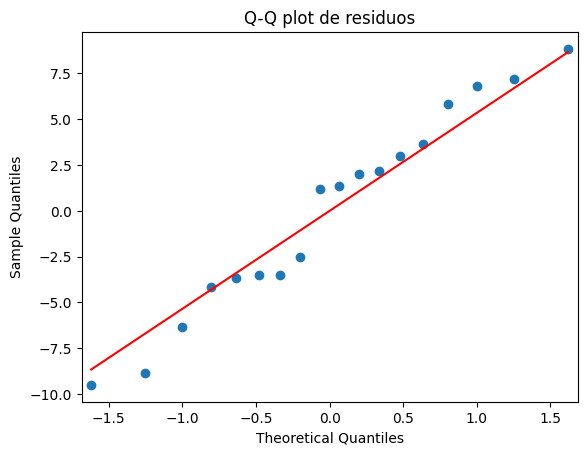

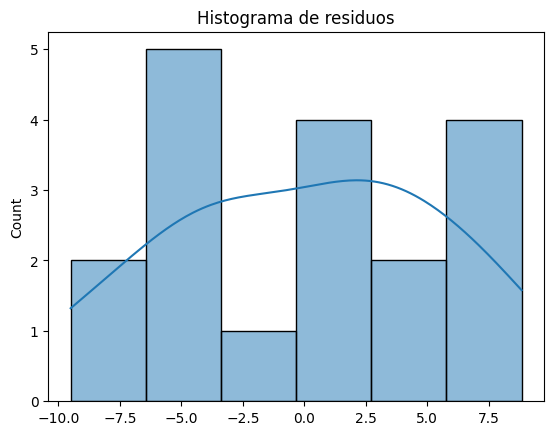

In [220]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No se rechaza ho, por lo tanto hay normalidad

In [221]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['marca_atomizador'] == 1]['moscas_muertas']
grupo2 = df[df['marca_atomizador'] == 2]['moscas_muertas']
grupo3 = df[df['marca_atomizador'] == 3]['moscas_muertas']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.5999140287120529


Hay homoscedasticidad

 Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -9.8333 0.0808 -14.6661 -5.0006   True
     1      3  -6.1667 0.3341 -10.9994 -1.3339   True
     2      3   3.6667 0.6655  -1.1661  8.4994  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

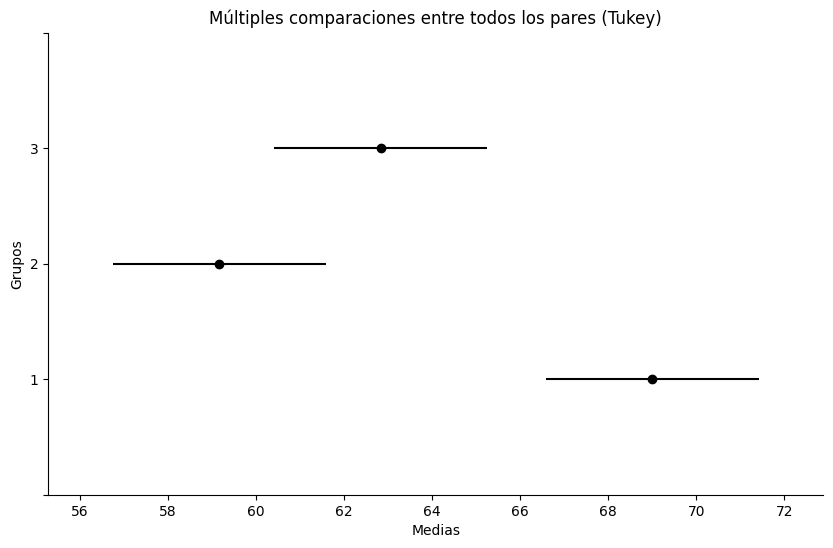

In [222]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['moscas_muertas'],
                          groups=df['marca_atomizador'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

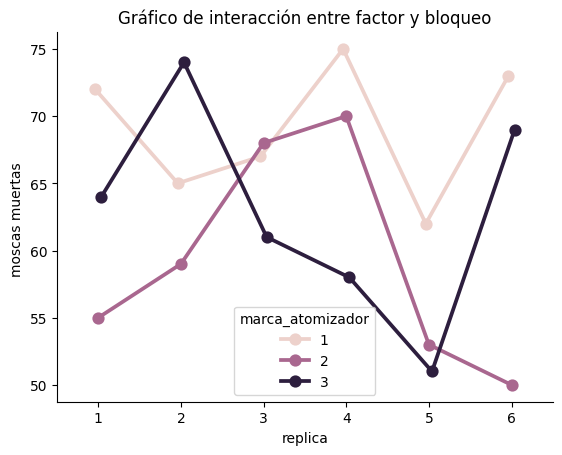

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="replica", y="moscas_muertas", hue="marca_atomizador", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("replica")
plt.ylabel("moscas muertas ")
plt.legend(title="marca_atomizador")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [224]:
df.groupby(["marca_atomizador"])["moscas_muertas"].mean()

marca_atomizador
1    69.000000
2    59.166667
3    62.833333
Name: moscas_muertas, dtype: float64

In [225]:
modelo_lineal.params

Intercept                   69.000000
C(marca_atomizador)[T.2]    -9.833333
C(marca_atomizador)[T.3]    -6.166667
C(replica)[T.2]              2.333333
C(replica)[T.3]              1.666667
C(replica)[T.4]              4.000000
C(replica)[T.5]             -8.333333
C(replica)[T.6]              0.333333
dtype: float64

##Problema 2
En una empresa lechera se tienen varios silos para almacenar leche (cisternas de 60 000 L). Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. Se sospecha que en algunos silos hay problemas, por ello, durante cinco días se decide registrar la temperatura a cierta hora crítica. Obviamente la temperatura de un día a otro es una fuente de variabilidad que podría impactar la variabilidad total.

| Silo | Lunes | Martes | Miércoles | Jueves | Viernes |
|------|-------|--------|-----------|--------|---------|
| A    | 4.0   | 4.0    | 5.0       | 0.5    | 3.0     |
| B    | 5.0   | 6.0    | 2.0       | 4.0    | 4.0     |
| C    | 4.5   | 4.0    | 3.5       | 2.0    | 3.0     |
| D    | 2.5   | 4.0    | 6.5       | 4.5    | 4.0     |
| E    | 4.0   | 4.0    | 3.5       | 2.0    | 4.0     |

**Preguntas:**<br>
a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?  
b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
c) ¿Hay diferencia entre los silos?  
d) ¿La temperatura de un día a otro es diferente?  
e) Revise residuos, ¿hay algún problema evidente?


In [226]:
import pandas as pd
from io import StringIO

data = '''
silo,dia,temperatura
A,Lunes,4.0
A,Martes,4.0
A,Miércoles,5.0
A,Jueves,0.5
A,Viernes,3.0
B,Lunes,5.0
B,Martes,6.0
B,Miércoles,2.0
B,Jueves,4.0
B,Viernes,4.0
C,Lunes,4.5
C,Martes,4.0
C,Miércoles,3.5
C,Jueves,2.0
C,Viernes,3.0
D,Lunes,2.5
D,Martes,4.0
D,Miércoles,6.5
D,Jueves,4.5
D,Viernes,4.0
E,Lunes,4.0
E,Martes,4.0
E,Miércoles,3.5
E,Jueves,2.0
E,Viernes,4.0
'''

df = pd.read_csv(StringIO(data))
df

silo        dia  temperatura
0     A      Lunes          4.0
1     A     Martes          4.0
2     A  Miércoles          5.0
3     A     Jueves          0.5
4     A    Viernes          3.0
5     B      Lunes          5.0
6     B     Martes          6.0
7     B  Miércoles          2.0
8     B     Jueves          4.0
9     B    Viernes          4.0
10    C      Lunes          4.5
11    C     Martes          4.0
12    C  Miércoles          3.5
13    C     Jueves          2.0
14    C    Viernes          3.0
15    D      Lunes          2.5
16    D     Martes          4.0
17    D  Miércoles          6.5
18    D     Jueves          4.5
19    D    Viernes          4.0
20    E      Lunes          4.0
21    E     Martes          4.0
22    E  Miércoles          3.5
23    E     Jueves          2.0
24    E    Viernes          4.0

In [227]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'temperatura ~ C(silo) + C(dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre silos
#Hi: Hay diferencia significativa en al menos un silo
#Alpha: 0.05

sum_sq    df         F    PR(>F)
Intercept   12.96   1.0  8.024768  0.012000
C(silo)      4.46   4.0  0.690402  0.609212
C(dia)       9.76   4.0  1.510836  0.246022
Residual    25.84  16.0       NaN       NaN

No se rechaza ho, no hay diferencia entre silos

In [228]:
#Ho: No hay diferencia significativa entre dias
#Hi: Hay diferencia significativa en al menos una dia
#Alpha: 0.05

No se rechaza ho, no hay diferencia entre días

valor-p (Shapiro) = 0.1527850137871632


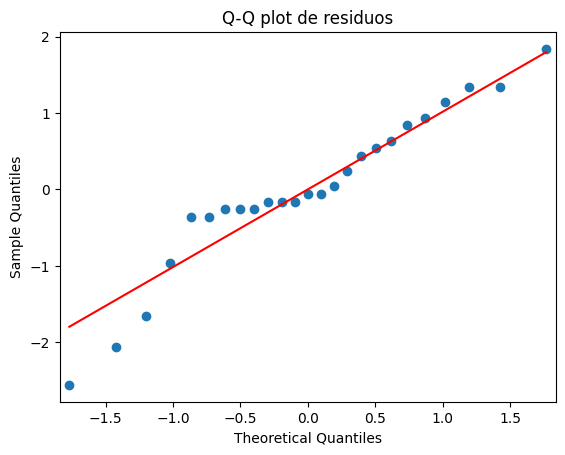

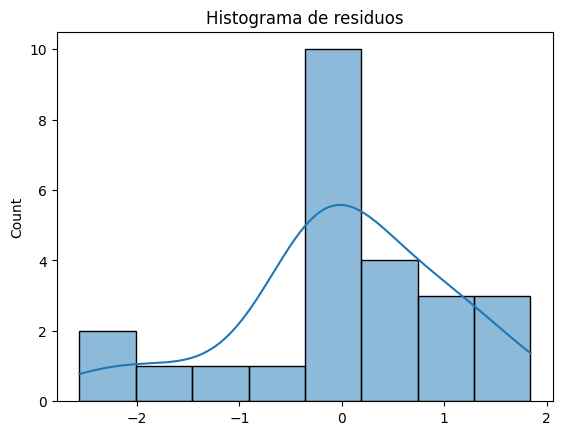

In [229]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No se rechaza ho, por lo tanto hay normalidad

In [230]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['silo'] == "A"]['temperatura']
grupo2 = df[df['silo'] == "B"]['temperatura']
grupo3 = df[df['silo'] == "C"]['temperatura']
grupo4 = df[df['silo'] == "D"]['temperatura']
grupo5 = df[df['silo'] == "E"]['temperatura']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.8915311038595306


No se rechaza ho, hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.50
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B      0.9 0.8211 -0.4705 2.2705  False
     A      C      0.1    1.0 -1.2705 1.4705  False
     A      D      1.0 0.7596 -0.3705 2.3705  False
     A      E      0.2 0.9992 -1.1705 1.5705  False
     B      C     -0.8 0.8745 -2.1705 0.5705  False
     B      D      0.1    1.0 -1.2705 1.4705  False
     B      E     -0.7 0.9183 -2.0705 0.6705  False
     C      D      0.9 0.8211 -0.4705 2.2705  False
     C      E      0.1    1.0 -1.2705 1.4705  False
     D      E     -0.8 0.8745 -2.1705 0.5705  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

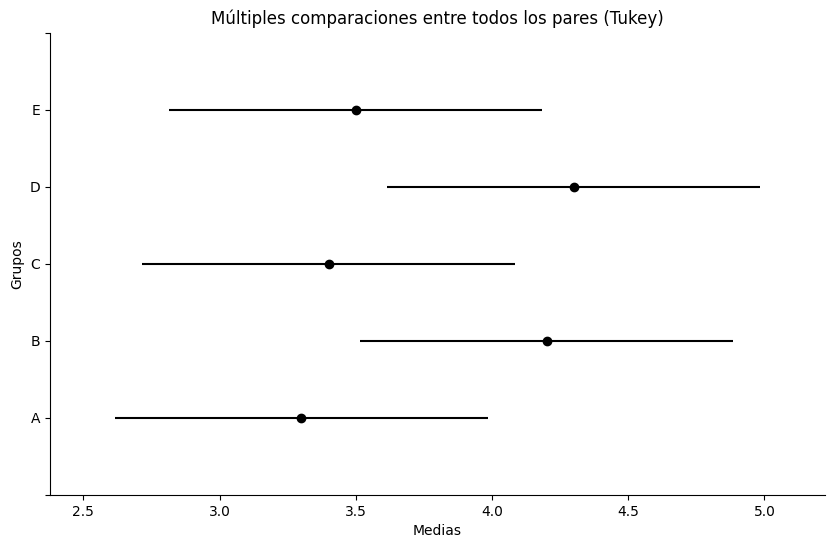

In [231]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['temperatura'],
                          groups=df['silo'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

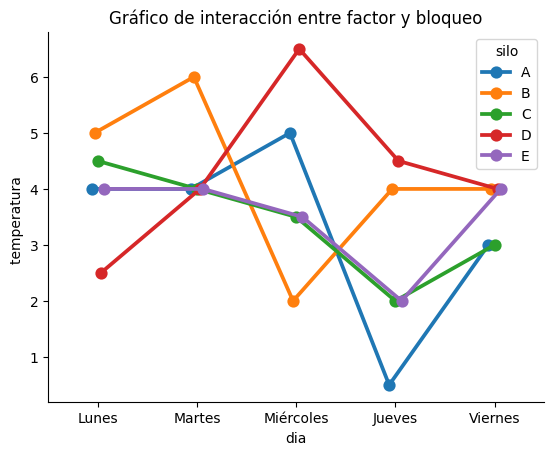

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="dia", y="temperatura", hue="silo", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("dia")
plt.ylabel("temperatura ")
plt.legend(title="silo")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [233]:
df.groupby(["silo"])["temperatura"].mean()

silo
A    3.3
B    4.2
C    3.4
D    4.3
E    3.5
Name: temperatura, dtype: float64

In [234]:
modelo_lineal.params

Intercept              2.16
C(silo)[T.B]           0.90
C(silo)[T.C]           0.10
C(silo)[T.D]           1.00
C(silo)[T.E]           0.20
C(dia)[T.Lunes]        1.40
C(dia)[T.Martes]       1.80
C(dia)[T.Miércoles]    1.50
C(dia)[T.Viernes]      1.00
dtype: float64

## Problema 3
Se diseñó un experimento para estudiar el rendimiento de cuatro detergentes. Las siguientes lecturas de “blancura” se obtuvieron con un equipo especial diseñado para 12 cargas de lavado, distribuidas en tres modelos de lavadoras:

| Detergente | Lavadora 1 | Lavadora 2 | Lavadora 3 |
|------------|------------|------------|------------|
| A          | 45         | 43         | 51         |
| B          | 47         | 44         | 52         |
| C          | 50         | 49         | 57         |
| D          | 42         | 37         | 49         |

**Preguntas:**<br>
a) Señale el nombre del diseño experimental utilizado.  
b) Formule la hipótesis que se quiere probar en este problema.  
c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.  



In [235]:
import pandas as pd
from io import StringIO

data = '''
detergente,lavadora,blancura
A,1,45
A,2,43
A,3,51
B,1,47
B,2,44
B,3,52
C,1,50
C,2,49
C,3,57
D,1,42
D,2,37
D,3,49
'''

df = pd.read_csv(StringIO(data))
df

detergente  lavadora  blancura
0           A         1        45
1           A         2        43
2           A         3        51
3           B         1        47
4           B         2        44
5           B         3        52
6           C         1        50
7           C         2        49
8           C         3        57
9           D         1        42
10          D         2        37
11          D         3        49

In [236]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'blancura ~ C(detergente) + C(lavadora)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre detergentes
#Hi: Hay diferencia significativa en al menos un detergente
#Alpha: 0.05

sum_sq   df            F        PR(>F)
Intercept      4080.055556  1.0  3125.148936  2.200417e-09
C(detergente)   133.666667  3.0    34.127660  3.633318e-04
C(lavadora)     170.166667  2.0    65.170213  8.522751e-05
Residual          7.833333  6.0          NaN           NaN

Se rechaza ho, por lo tanto hay relación entre detergentes, hay diferencia en al menos uno de ellos

In [237]:
#Ho: No hay diferencia significativa entre lavadoras
#Hi: Hay diferencia significativa en al menos una lavadora
#Alpha: 0.05

Se rechaza ho, por lo tanto hay diferencia significativa entre lavadoras

valor-p (Shapiro) = 0.8945576994890372


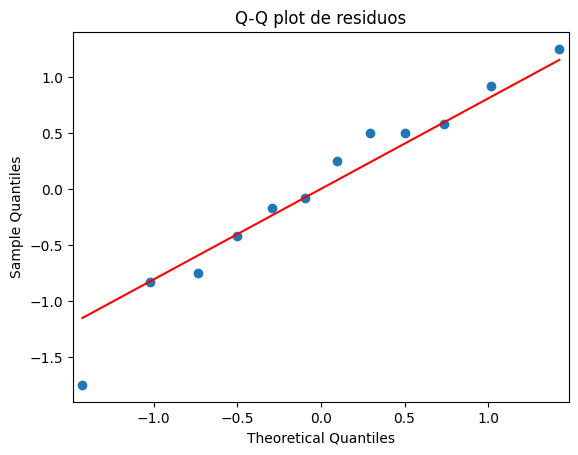

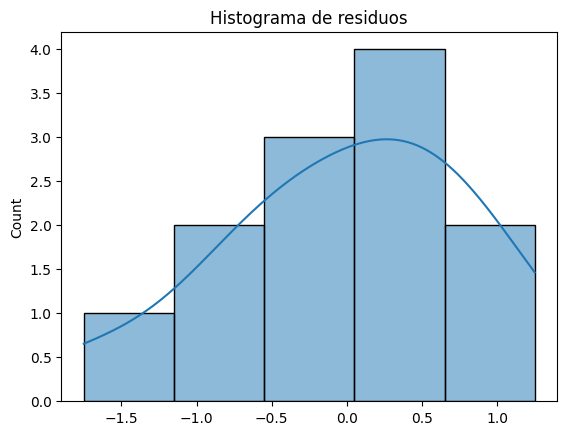

In [238]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No se rechaza ho, por lo tanto hay normalidad

In [239]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['detergente'] == "A"]['blancura']
grupo2 = df[df['detergente'] == "B"]['blancura']
grupo3 = df[df['detergente'] == "C"]['blancura']
grupo4 = df[df['detergente'] == "D"]['blancura']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.9432760038375858


No se rechaza ho, por lo tanto hay homoscedaticidad

 Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   1.3333 0.9847  -4.2963   6.963  False
     A      C   5.6667  0.495    0.037 11.2963   True
     A      D  -3.6667  0.779  -9.2963   1.963  False
     B      C   4.3333 0.6855  -1.2963   9.963  False
     B      D     -5.0 0.5887 -10.6296  0.6296  False
     C      D  -9.3333 0.1495  -14.963 -3.7037   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

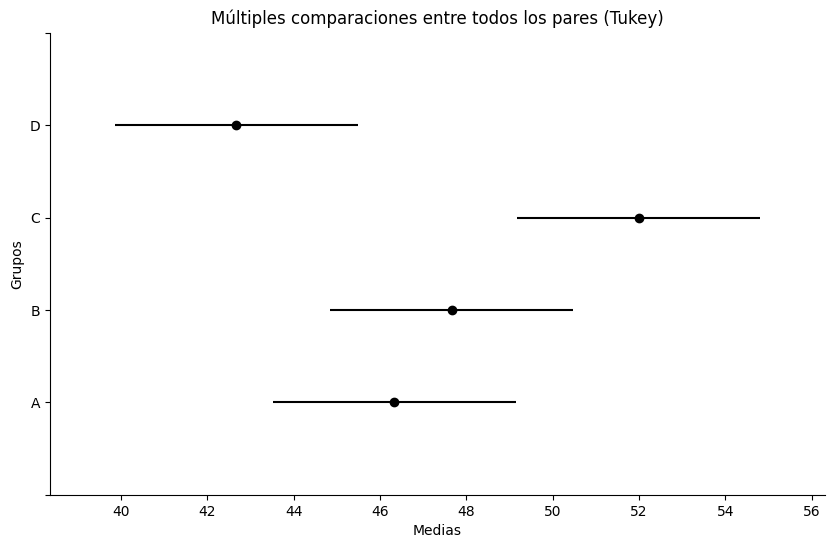

In [240]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['blancura'], groups=df['detergente'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

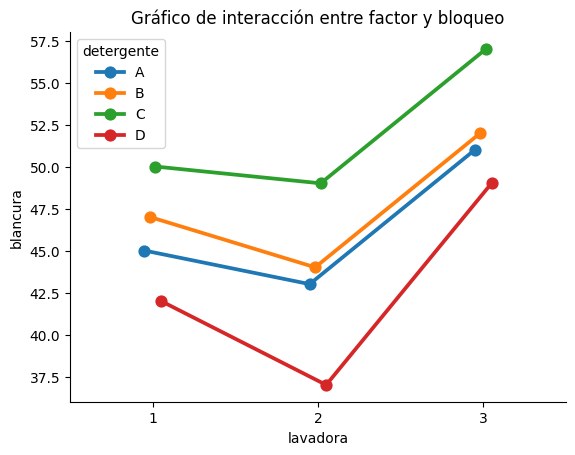

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="lavadora", y="blancura", hue="detergente", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("lavadora")
plt.ylabel("blancura")
plt.legend(title="detergente")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()


In [242]:
df.groupby(["detergente"])["blancura"].mean()

detergente
A    46.333333
B    47.666667
C    52.000000
D    42.666667
Name: blancura, dtype: float64

In [243]:
modelo_lineal.params

Intercept             45.166667
C(detergente)[T.B]     1.333333
C(detergente)[T.C]     5.666667
C(detergente)[T.D]    -3.666667
C(lavadora)[T.2]      -2.750000
C(lavadora)[T.3]       6.250000
dtype: float64

## Problema 4
Con respecto al problema anterior:<br>
a) Conteste los tres incisos del problema anterior sin tomar en cuenta el efecto de las lavadoras y obtenga conclusiones.  
b) ¿Hay diferencias en las conclusiones anteriores y las del problema anterior? Explique su respuesta.  
c) ¿Con cuáles conclusiones se queda? Explique su respuesta.

### problema 3.1

In [244]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('blancura ~ C(detergente)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables
#Hi: si hay relación entre variables
#alpha= 0.05

df      sum_sq    mean_sq         F   PR(>F)
C(detergente)  3.0  133.666667  44.555556  2.002497  0.19229
Residual       8.0  178.000000  22.250000       NaN      NaN

No se rechaza ho, por lo tanto no hay diferencia significativa entre detergentes. No hay relación entre variables.

valor-p (Shapiro) = 0.14533139517179772


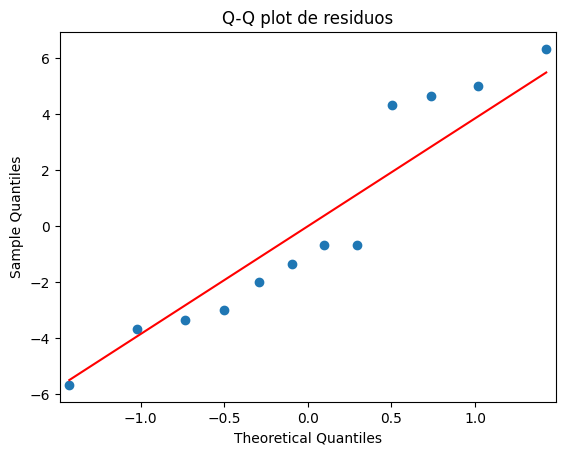

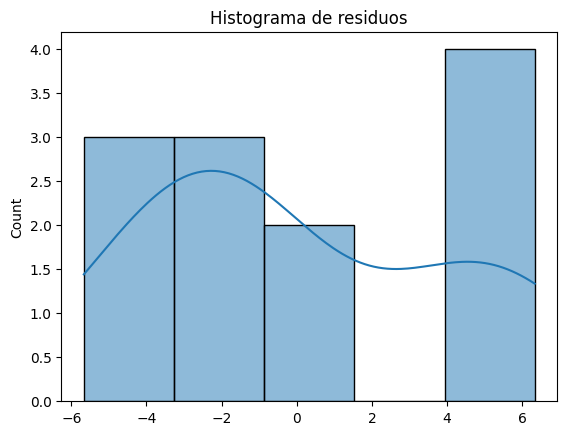

In [245]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No se rechaza ho, hay normalidad.

In [246]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['detergente'] == 'A']['blancura']
grupo2 = df[df['detergente'] == 'B']['blancura']
grupo3 = df[df['detergente'] == 'C']['blancura']
grupo4 = df[df['detergente'] == 'D']['blancura']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.9432760038375858


No se rechaza ho, hay homoscedasticidad

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   1.3333 0.9847 -11.0002 13.6669  False
     A      C   5.6667  0.495  -6.6669 18.0002  False
     A      D  -3.6667  0.779 -16.0002  8.6669  False
     B      C   4.3333 0.6855  -8.0002 16.6669  False
     B      D     -5.0 0.5887 -17.3336  7.3336  False
     C      D  -9.3333 0.1495 -21.6669  3.0002  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

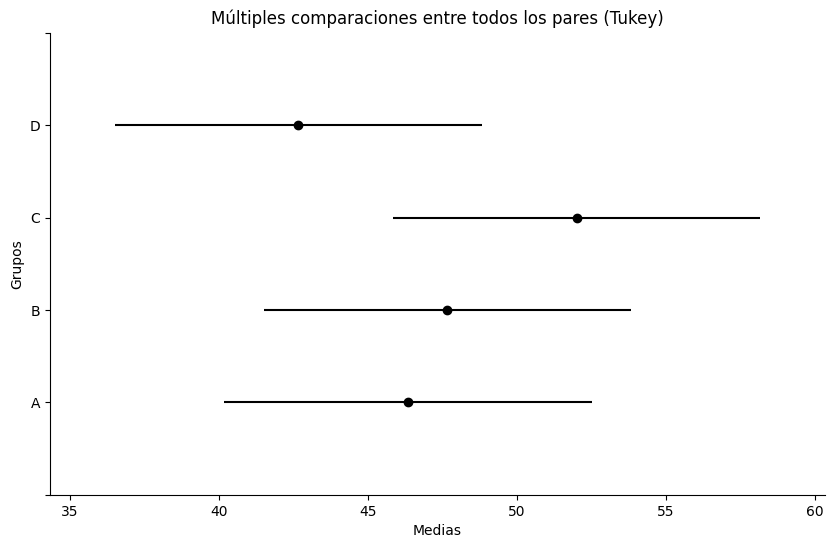

In [247]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['blancura'], groups=df['detergente'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

## Problema 5
Una de las variables críticas en el proceso de ensamble del brazo lector de un disco duro es el ángulo que este forma con el cuerpo principal de la cabeza lectora. Se corre un experimento con el objetivo de comparar dos equipos que miden dicho ángulo en unidades de radianes. Se decide utilizar como factor de bloque a los operadores de los equipos. Los resultados se muestran en la siguiente tabla:

| Operador | Equipo 1                                         | Equipo 2                                         |
|----------|--------------------------------------------------|--------------------------------------------------|
| 1        | 1.328, 0.985, 1.316, 1.553, 1.310               | 1.273, 0.985, 1.134, 1.412, 0.917               |
|          | 1.113, 1.057, 1.144, 1.485, 1.386               | 0.789, 0.671, 0.554, 1.386, 1.289               |
| 2        | 1.269, 1.268, 1.091, 1.195, 1.380               | 1.036, 0.783, 1.108, 1.129, 1.132               |
|          | 1.093, 0.984, 1.087, 1.482, 1.442               | 0.201, 0.900, 0.916, 1.434, 1.223               |
| 3        | 1.440, 1.079, 1.389, 1.611, 1.445               | 1.454, 1.063, 1.219, 1.602, 1.583               |
|          | 1.150, 1.190, 1.247, 1.617, 1.574               | 1.018, 1.050, 0.997, 1.538, 1.478               |

### Preguntas y ejercicios:
a) Plantee el modelo y las hipótesis más adecuadas al problema.  
b) ¿Existen diferencias entre los equipos? Argumente estadísticamente.  
c) ¿Existen diferencias entre los operadores?  
d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores, después interprételas.  
e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.


In [248]:
import pandas as pd
from io import StringIO

data = '''
operador,equipo,radianes
1,1,1.328
1,1,0.985
1,1,1.316
1,1,1.553
1,1,1.310
1,2,1.273
1,2,0.985
1,2,1.134
1,2,1.412
1,2,0.917
1,1,1.113
1,1,1.057
1,1,1.144
1,1,1.485
1,1,1.386
1,2,0.789
1,2,0.671
1,2,0.554
1,2,1.386
1,2,1.289
2,1,1.269
2,1,1.268
2,1,1.091
2,1,1.195
2,1,1.380
2,2,1.036
2,2,0.783
2,2,1.108
2,2,1.129
2,2,1.132
2,1,1.093
2,1,0.984
2,1,1.087
2,1,1.482
2,1,1.442
2,2,0.201
2,2,0.900
2,2,0.916
2,2,1.434
2,2,1.223
3,1,1.440
3,1,1.079
3,1,1.389
3,1,1.611
3,1,1.445
3,2,1.454
3,2,1.063
3,2,1.219
3,2,1.602
3,2,1.583
3,1,1.150
3,1,1.190
3,1,1.247
3,1,1.617
3,1,1.574
3,2,1.018
3,2,1.050
3,2,0.997
3,2,1.538
3,2,1.478
'''

df = pd.read_csv(StringIO(data))
df

operador  equipo  radianes
0          1       1     1.328
1          1       1     0.985
2          1       1     1.316
3          1       1     1.553
4          1       1     1.310
5          1       2     1.273
6          1       2     0.985
7          1       2     1.134
8          1       2     1.412
9          1       2     0.917
10         1       1     1.113
11         1       1     1.057
12         1       1     1.144
13         1       1     1.485
14         1       1     1.386
15         1       2     0.789
16         1       2     0.671
17         1       2     0.554
18         1       2     1.386
19         1       2     1.289
20         2       1     1.269
21         2       1     1.268
22         2       1     1.091
23         2       1     1.195
24         2       1     1.380
25         2       2     1.036
26         2       2     0.783
27         2       2     1.108
28         2       2     1.129
29         2       2     1.132
30         2       1     1.093
31         2       1     0.984
32         2       1     1.087
33         2       1     1.482
34         2       1     1.442
35         2       2     0.201
36         2       2     0.900
37         2       2     0.916
38         2       2     1.434
39         2       2     1.223
40         3       1     1.440
41         3       1     1.079
42         3       1     1.389
43         3       1     1.611
44         3       1     1.445
45         3       2     1.454
46         3       2     1.063
47         3       2     1.219
48         3       2     1.602
49         3       2     1.583
50         3       1     1.150
51         3       1     1.190
52         3       1     1.247
53         3       1     1.617
54         3       1     1.574
55         3       2     1.018
56         3       2     1.050
57         3       2     0.997
58         3       2     1.538
59         3       2     1.478

In [249]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'radianes ~ C(equipo) + C(operador)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre equipos
#Hi: Hay diferencia significativa en al menos un equipo
#Alpha: 0.05

sum_sq    df           F        PR(>F)
Intercept    23.248508   1.0  381.866384  1.112323e-26
C(equipo)     0.492502   1.0    8.089543  6.205459e-03
C(operador)   0.588721   2.0    4.834997  1.156084e-02
Residual      3.409351  56.0         NaN           NaN

Se rechaza ho, por lo tanto hay diferencia significativa entre al menos un equipo

In [250]:
#Ho: No hay diferencia significativa entre operadores
#Hi: Hay diferencia significativa en al menos un operador
#Alpha: 0.05

Se rechaza ho, por lo tanto hay diferencia significativa entre al menos un operador

valor-p (Shapiro) = 0.055016478051682846


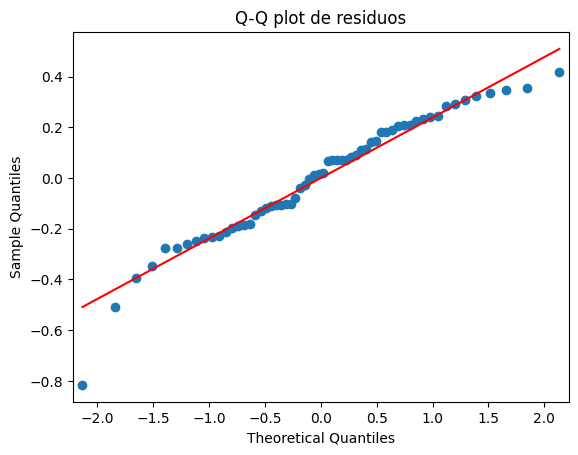

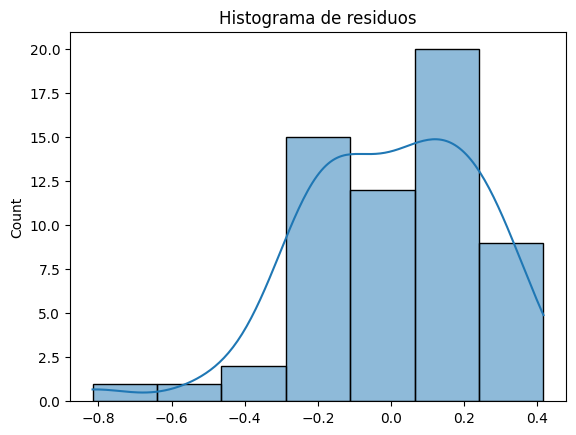

In [251]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No se rechaza ho, hay normalidad

In [252]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['equipo'] == 1]['radianes']
grupo2 = df[df['equipo'] == 2]['radianes']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.04685739874241189


Se rechaza ho, por lo tanto no hay homoscedasticidad

Lambda óptimo: 1.8779222848260797


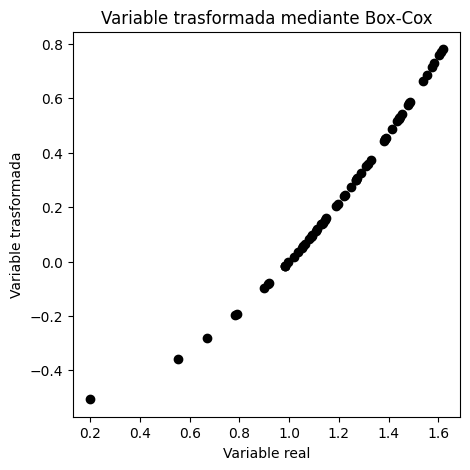

In [253]:
#si no se cumple con el supuesto de normalidad o de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["radianes_boxcox"], lambda_opt = boxcox(df["radianes"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["radianes"], df["radianes_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [254]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'radianes_boxcox ~ C(equipo) + C(operador)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre operadores
#Hi: Hay diferencia significativa en al menos un operador
#Alpha: 0.05

sum_sq    df          F    PR(>F)
Intercept    1.237981   1.0  17.500397  0.000102
C(equipo)    0.507174   1.0   7.169540  0.009712
C(operador)  0.764988   2.0   5.407025  0.007128
Residual     3.961450  56.0        NaN       NaN

Hay relación

valor-p (Shapiro) = 0.1401259378491958


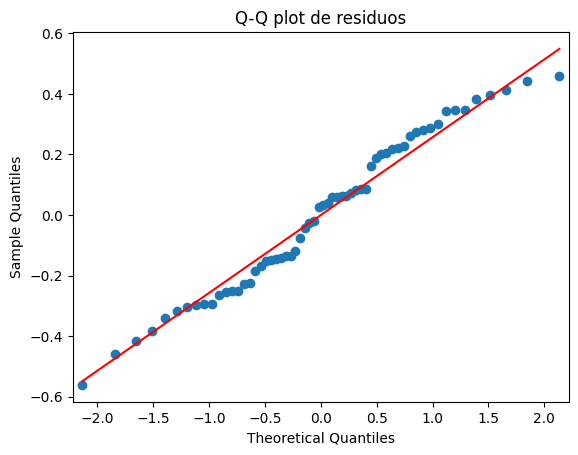

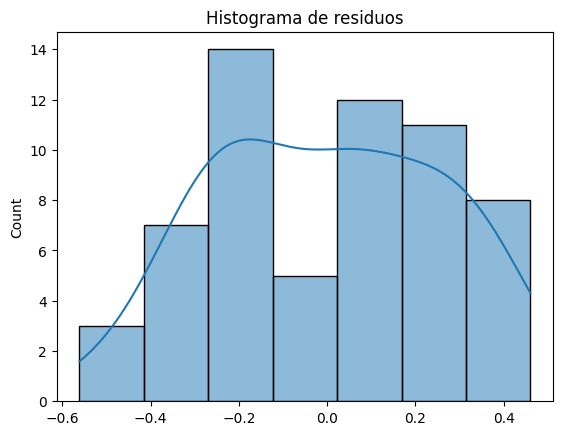

In [255]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [256]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['equipo'] == 1]['radianes_boxcox']
grupo2 = df[df['equipo'] == 2]['radianes_boxcox']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.17035730871570146


Hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.1839 0.0155 -0.2339 -0.1339   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

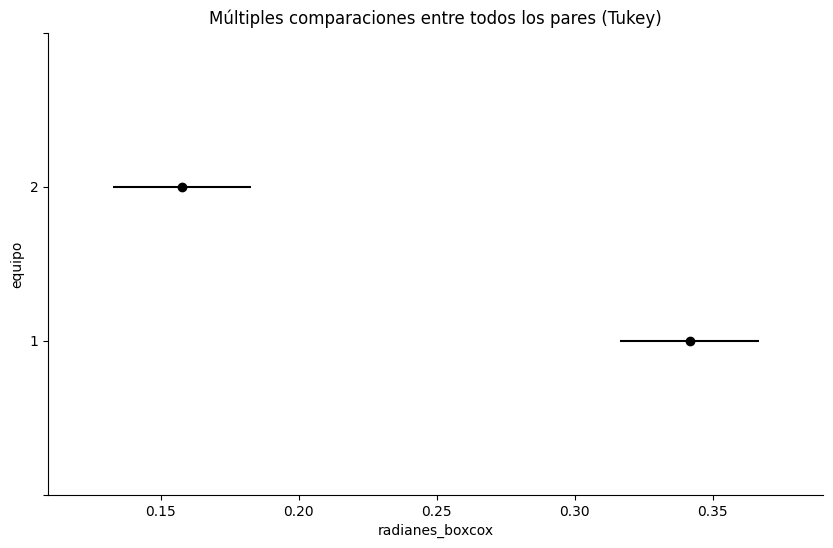

In [257]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['radianes_boxcox'], groups=df['equipo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="equipo", xlabel="radianes_boxcox")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

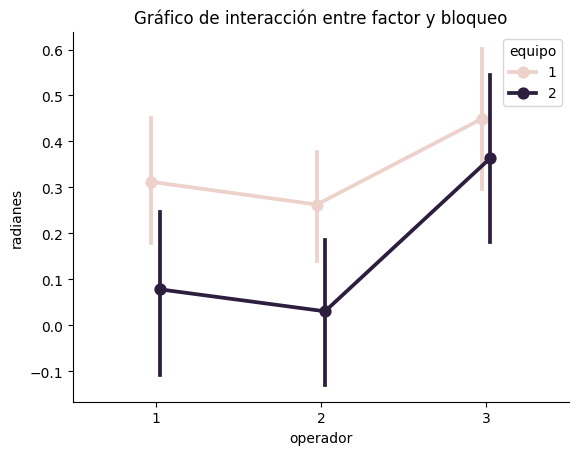

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="operador", y="radianes_boxcox", hue="equipo", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("operador")
plt.ylabel("radianes")
plt.legend(title="equipo")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [259]:
df.groupby(["equipo"])["radianes_boxcox"].mean()

equipo
1    0.341580
2    0.157701
Name: radianes_boxcox, dtype: float64

In [260]:
modelo_lineal.params

Intercept           0.287284
C(equipo)[T.2]     -0.183879
C(operador)[T.2]   -0.048608
C(operador)[T.3]    0.211497
dtype: float64

## Problema 6
Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. De manera tradicional se han usado termómetros de mercurio (Mer) para verificar que la temperatura sea la adecuada, pero ahora se han comprado termómetros electrónicos (Rtd) para facilitar el proceso de medición. Sin embargo, se duda de las mediciones de estos nuevos dispositivos. Para aclarar dudas y diagnosticar la situación, durante cinco días se toman mediciones con ambos tipos de termómetros en varios silos (a la misma hora). Los datos para cinco silos se muestran a continuación:

| Silo | Día 1 (Mer) | Día 1 (Rtd) | Día 2 (Mer) | Día 2 (Rtd) | Día 3 (Mer) | Día 3 (Rtd) | Día 4 (Mer) | Día 4 (Rtd) | Día 5 (Mer) | Día 5 (Rtd) |
|------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|--|
| A    | 4.0         | 2.6         | 4.0         | 2.8         | 5.0         | 5.0         | 0.5         | 0.0         | 3.0         | 2.4         |
| B    | 5.0         | 6.4         | 6.0         | 6.4         | 2.0         | 2.3         | 4.0         | 4.2         | 4.0         | 4.0         |
| C    | 4.5         | 3.3         | 4.0         | 1.4         | 3.5         | 1.8         | 2.0         | -1.9        | 3.0         | -7.6        |
| D    | 2.5         | 3.1         | 4.0         | 5.0         | 6.5         | 6.6         | 4.5         | 2.7         | 4.0         | 4.0         |
| E    | 4.0         | 0.0         | 4.0         | 3.5         | 0.6         | 2.0         | -4.0        | -4.0        | -4.0        | -6.3        |

**Preguntas:**<br>
a) Observe los datos y establezca una conjetura acerca de la confiabilidad de las mediciones con Rtd (del termómetro de mercurio no hay duda).  
b) Es claro que el silo se puede ver como tratamiento y día como bloque. Considere sólo los datos de Rtd y establezca el modelo estadístico. También haga el ANOVA correspondiente y obtenga conclusiones.  
c) Repita el inciso anterior pero ahora para las mediciones Mer.  
d) ¿Las conclusiones obtenidas en los incisos anteriores coinciden? Comente su respuesta.  
e) Datos pareados. Para comparar los dos métodos de medición (Mer y Rtd) obtenga como variable de respuesta la diferencia de temperatura que registran los métodos para cada día en cada silo. Considerando esto, establezca el modelo estadístico, haga el ANOVA correspondiente y obtenga conclusiones.


In [261]:
import pandas as pd
from io import StringIO

data = '''
silo,dia,termometro,temperatura
A,1,Mer,4.0
A,1,Rtd,2.6
A,2,Mer,4.0
A,2,Rtd,2.8
A,3,Mer,5.0
A,3,Rtd,5.0
A,4,Mer,0.5
A,4,Rtd,0.0
A,5,Mer,3.0
A,5,Rtd,2.4
B,1,Mer,5.0
B,1,Rtd,6.4
B,2,Mer,6.0
B,2,Rtd,6.4
B,3,Mer,2.0
B,3,Rtd,2.3
B,4,Mer,4.0
B,4,Rtd,4.2
B,5,Mer,4.0
B,5,Rtd,4.0
C,1,Mer,4.5
C,1,Rtd,3.3
C,2,Mer,4.0
C,2,Rtd,1.4
C,3,Mer,3.5
C,3,Rtd,1.8
C,4,Mer,2.0
C,4,Rtd,-1.9
C,5,Mer,3.0
C,5,Rtd,-7.6
D,1,Mer,2.5
D,1,Rtd,3.1
D,2,Mer,4.0
D,2,Rtd,5.0
D,3,Mer,6.5
D,3,Rtd,6.6
D,4,Mer,4.5
D,4,Rtd,2.7
D,5,Mer,4.0
D,5,Rtd,4.0
E,1,Mer,4.0
E,1,Rtd,0.0
E,2,Mer,4.0
E,2,Rtd,3.5
E,3,Mer,0.6
E,3,Rtd,2.0
E,4,Mer,-4.0
E,4,Rtd,-4.0
E,5,Mer,-4.0
E,5,Rtd,-6.3

'''

df = pd.read_csv(StringIO(data))
df

silo  dia termometro  temperatura
0     A    1        Mer          4.0
1     A    1        Rtd          2.6
2     A    2        Mer          4.0
3     A    2        Rtd          2.8
4     A    3        Mer          5.0
5     A    3        Rtd          5.0
6     A    4        Mer          0.5
7     A    4        Rtd          0.0
8     A    5        Mer          3.0
9     A    5        Rtd          2.4
10    B    1        Mer          5.0
11    B    1        Rtd          6.4
12    B    2        Mer          6.0
13    B    2        Rtd          6.4
14    B    3        Mer          2.0
15    B    3        Rtd          2.3
16    B    4        Mer          4.0
17    B    4        Rtd          4.2
18    B    5        Mer          4.0
19    B    5        Rtd          4.0
20    C    1        Mer          4.5
21    C    1        Rtd          3.3
22    C    2        Mer          4.0
23    C    2        Rtd          1.4
24    C    3        Mer          3.5
25    C    3        Rtd          1.8
26    C    4        Mer          2.0
27    C    4        Rtd         -1.9
28    C    5        Mer          3.0
29    C    5        Rtd         -7.6
30    D    1        Mer          2.5
31    D    1        Rtd          3.1
32    D    2        Mer          4.0
33    D    2        Rtd          5.0
34    D    3        Mer          6.5
35    D    3        Rtd          6.6
36    D    4        Mer          4.5
37    D    4        Rtd          2.7
38    D    5        Mer          4.0
39    D    5        Rtd          4.0
40    E    1        Mer          4.0
41    E    1        Rtd          0.0
42    E    2        Mer          4.0
43    E    2        Rtd          3.5
44    E    3        Mer          0.6
45    E    3        Rtd          2.0
46    E    4        Mer         -4.0
47    E    4        Rtd         -4.0
48    E    5        Mer         -4.0
49    E    5        Rtd         -6.3

In [262]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'temperatura ~ C(termometro) + C(silo) + C(dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre termometros
#Hi: Hay diferencia significativa en al menos un termometro
#Alpha: 0.05

sum_sq    df          F    PR(>F)
Intercept      100.44162   1.0  20.654505  0.000050
C(termometro)   14.47220   1.0   2.976019  0.092227
C(silo)        168.46920   4.0   8.660872  0.000039
C(dia)         110.43720   4.0   5.677491  0.001025
Residual       194.51760  40.0        NaN       NaN

No se rechaza ho, por lo tanto no hay relacion entre variables y no hay diferencia entre termometros

In [263]:
#Ho: No hay diferencia significativa entre silos
#Hi: Hay diferencia significativa en al menos un silo
#Alpha: 0.05

Se rechaza ho, por lo tanto si hay relacion entre variables y también hay diferencia entre silos

In [264]:
#Ho: No hay diferencia significativa entre dias
#Hi: Hay diferencia significativa en al menos un dia
#Alpha: 0.05

Se rechaza ho, por lo tanto si hay relacion entre variables y también hay diferencia entre dias

valor-p (Shapiro) = 0.016256282483184573


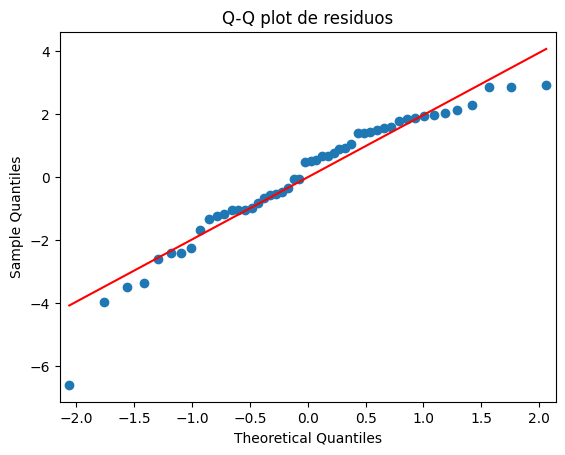

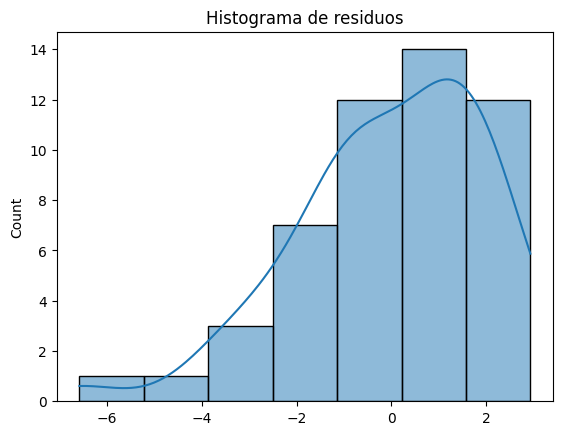

In [265]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No hay normalidad

In [266]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['termometro'] == "Rtd"]['temperatura']
grupo2 = df[df['termometro'] == "Mer"]['temperatura']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.1935998956836298


hay homoscedasticidad

Lambda óptimo: 2.6132138268348113


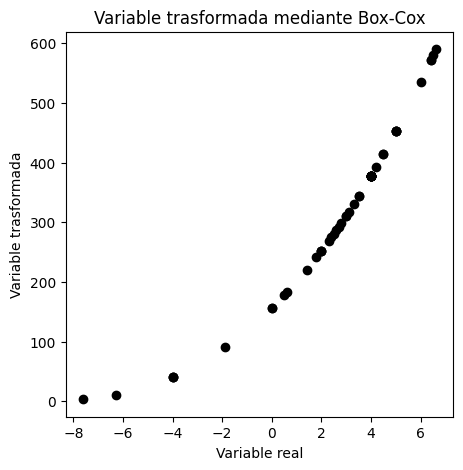

In [267]:
#si no se cumple con el supuesto de normalidad o de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0 ya que si lo hcemos con variables neg dara error
df["temperatura_boxcox"], lambda_opt = boxcox(df["temperatura"]+10) #le sumamos 10 para que no haya error
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["temperatura"], df["temperatura_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [268]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'temperatura_boxcox ~ C(termometro) + C(silo) + C(dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre silos
#Hi: Hay diferencia significativa en al menos un silo
#Alpha: 0.05

sum_sq    df          F        PR(>F)
Intercept      716441.311220   1.0  70.405872  2.352593e-10
C(termometro)   22941.764784   1.0   2.254525  1.410779e-01
C(silo)        396722.321209   4.0   9.746640  1.337930e-05
C(dia)         231298.601073   4.0   5.682524  1.018531e-03
Residual       407034.977783  40.0        NaN           NaN

No hay diferencia significativa aun

valor-p (Shapiro) = 0.2728106709161434


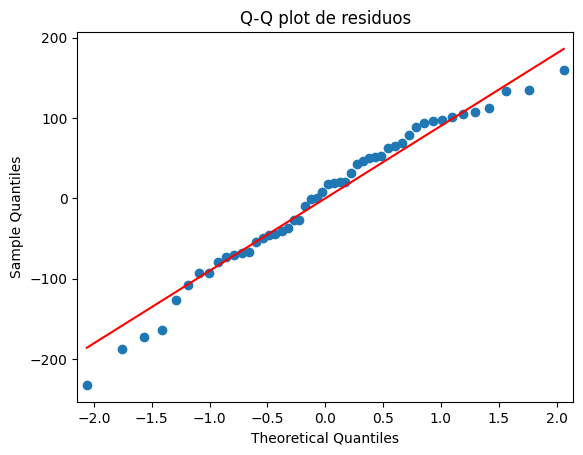

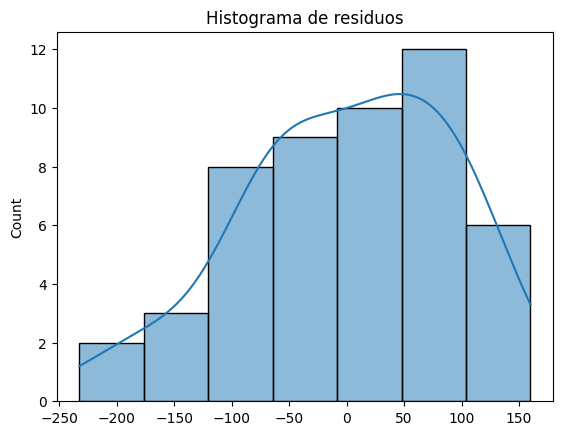

In [269]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [270]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['termometro'] == "Rtd"]['temperatura_boxcox']
grupo2 = df[df['termometro'] == "Mer"]['temperatura_boxcox']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.22049785564053534


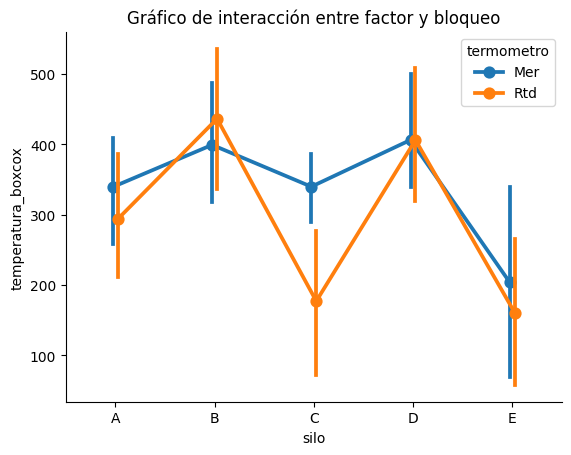

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="silo", y="temperatura_boxcox", hue="termometro", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("silo")
plt.ylabel("temperatura_boxcox")
plt.legend(title="termometro")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [272]:
df.groupby(["termometro"])["temperatura_boxcox"].mean()

termometro
Mer    337.902058
Rtd    295.061176
Name: temperatura_boxcox, dtype: float64

In [273]:
modelo_lineal.params

Intercept               378.534361
C(termometro)[T.Rtd]    -42.840882
C(silo)[T.B]            101.171802
C(silo)[T.C]            -58.213872
C(silo)[T.D]             89.503918
C(silo)[T.E]           -134.303279
C(dia)[T.2]              36.830680
C(dia)[T.3]               5.125209
C(dia)[T.4]            -133.071473
C(dia)[T.5]            -110.204498
dtype: float64

### problema 6b

In [274]:
import pandas as pd
from io import StringIO

data = '''
silo,dia,termometro,temperatura
A,1,Rtd,2.6
A,2,Rtd,2.8
A,3,Rtd,5.0
A,4,Rtd,0.0
A,5,Rtd,2.4
B,1,Rtd,6.4
B,2,Rtd,6.4
B,3,Rtd,2.3
B,4,Rtd,4.2
B,5,Rtd,4.0
C,1,Rtd,3.3
C,2,Rtd,1.4
C,3,Rtd,1.8
C,4,Rtd,-1.9
C,5,Rtd,-7.6
D,1,Rtd,3.1
D,2,Rtd,5.0
D,3,Rtd,6.6
D,4,Rtd,2.7
D,5,Rtd,4.0
E,1,Rtd,0.0
E,2,Rtd,3.5
E,3,Rtd,2.0
E,4,Rtd,-4.0
E,5,Rtd,-6.3

'''

df = pd.read_csv(StringIO(data))
df

silo  dia termometro  temperatura
0     A    1        Rtd          2.6
1     A    2        Rtd          2.8
2     A    3        Rtd          5.0
3     A    4        Rtd          0.0
4     A    5        Rtd          2.4
5     B    1        Rtd          6.4
6     B    2        Rtd          6.4
7     B    3        Rtd          2.3
8     B    4        Rtd          4.2
9     B    5        Rtd          4.0
10    C    1        Rtd          3.3
11    C    2        Rtd          1.4
12    C    3        Rtd          1.8
13    C    4        Rtd         -1.9
14    C    5        Rtd         -7.6
15    D    1        Rtd          3.1
16    D    2        Rtd          5.0
17    D    3        Rtd          6.6
18    D    4        Rtd          2.7
19    D    5        Rtd          4.0
20    E    1        Rtd          0.0
21    E    2        Rtd          3.5
22    E    3        Rtd          2.0
23    E    4        Rtd         -4.0
24    E    5        Rtd         -6.3

In [275]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'temperatura ~ C(silo) + C(dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre silos
#Hi: Hay diferencia significativa en al menos un silo
#Alpha: 0.05

sum_sq    df         F    PR(>F)
Intercept   37.047511   1.0  6.526356  0.021202
C(silo)    140.542400   4.0  6.189550  0.003304
C(dia)      86.898400   4.0  3.827044  0.022852
Residual    90.825600  16.0       NaN       NaN

Se rechaza ho, hay diferencia significativa entre silos o al menos en uno de ellos.

In [276]:
#Ho: No hay diferencia significativa entre dias
#Hi: Hay diferencia significativa en al menos un dia
#Alpha: 0.05

Se rechaza ho, hay diferencia significativa entre días o al menos en uno de ellos.

valor-p (Shapiro) = 0.3333006635714775


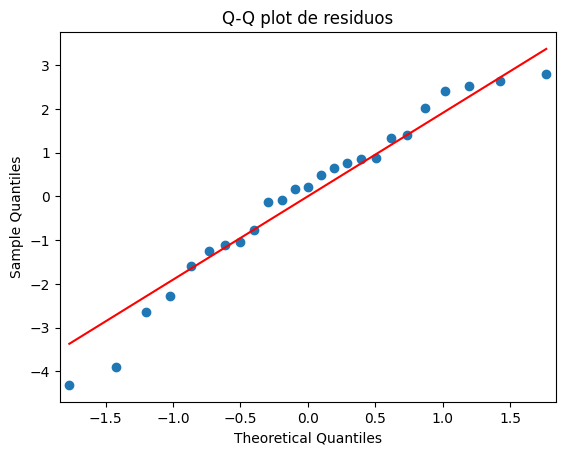

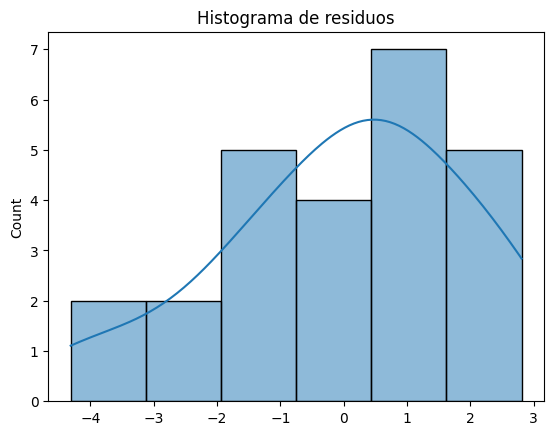

In [277]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05
# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No se rechaza ho, por lo tanto hay normalidad

In [278]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['silo'] == 'A']['temperatura']
grupo2 = df[df['silo'] == 'B']['temperatura']
grupo3 = df[df['silo'] == 'C']['temperatura']
grupo4 = df[df['silo'] == 'D']['temperatura']
grupo5 = df[df['silo'] == 'E']['temperatura']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.3557132939813411


No se rechaza ho, por lo tanto hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.50
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     A      B      2.1 0.7974 -0.962  5.162  False
     A      C    -3.16 0.4698 -6.222 -0.098   True
     A      D     1.72 0.8888 -1.342  4.782  False
     A      E    -3.52 0.3657 -6.582 -0.458   True
     B      C    -5.26 0.0751 -8.322 -2.198   True
     B      D    -0.38 0.9996 -3.442  2.682  False
     B      E    -5.62 0.0512 -8.682 -2.558   True
     C      D     4.88 0.1107  1.818  7.942   True
     C      E    -0.36 0.9997 -3.422  2.702  False
     D      E    -5.24 0.0767 -8.302 -2.178   True
--------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

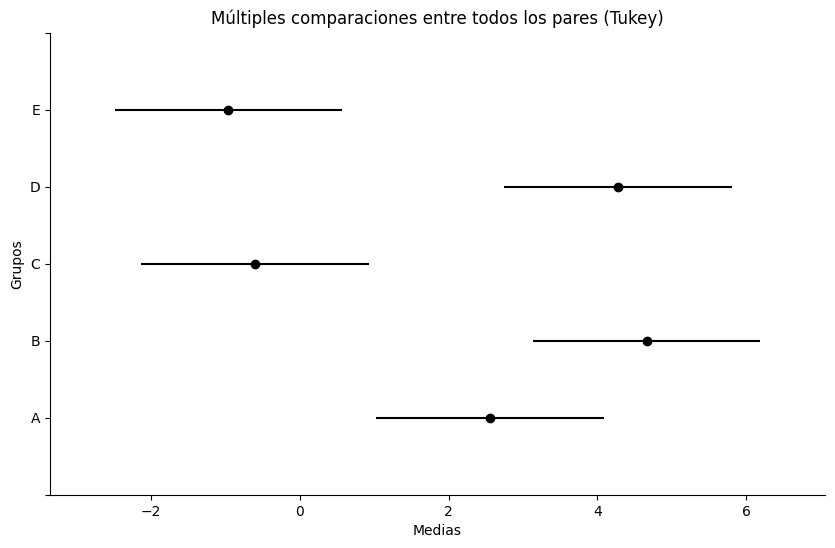

In [279]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['temperatura'], groups=df['silo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

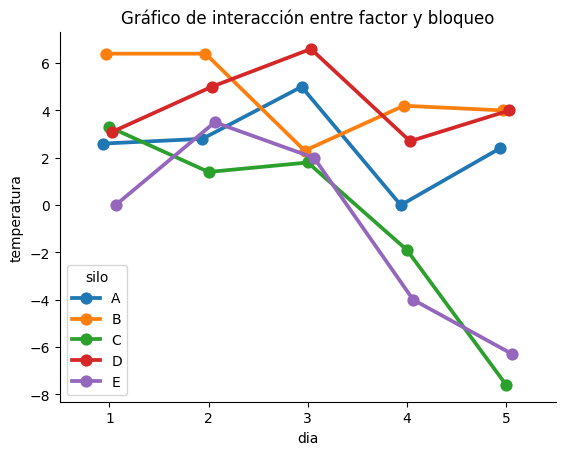

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="dia", y="temperatura", hue="silo", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("dia")
plt.ylabel("temperatura")
plt.legend(title="silo")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [281]:
df.groupby(["silo"])["temperatura"].mean()

silo
A    2.56
B    4.66
C   -0.60
D    4.28
E   -0.96
Name: temperatura, dtype: float64

In [282]:
modelo_lineal.params

Intercept       3.652
C(silo)[T.B]    2.100
C(silo)[T.C]   -3.160
C(silo)[T.D]    1.720
C(silo)[T.E]   -3.520
C(dia)[T.2]     0.740
C(dia)[T.3]     0.460
C(dia)[T.4]    -2.880
C(dia)[T.5]    -3.780
dtype: float64

### problema 6c

In [283]:
import pandas as pd
from io import StringIO

data = '''
silo,dia,termometro,temperatura
A,1,Mer,4.0
A,2,Mer,4.0
A,3,Mer,5.0
A,4,Mer,0.5
A,5,Mer,3.0
B,1,Mer,5.0
B,2,Mer,6.0
B,3,Mer,2.0
B,4,Mer,4.0
B,5,Mer,4.0
C,1,Mer,4.5
C,2,Mer,4.0
C,3,Mer,3.5
C,4,Mer,2.0
C,5,Mer,3.0
D,1,Mer,2.5
D,2,Mer,4.0
D,3,Mer,6.5
D,4,Mer,4.5
D,5,Mer,4.0
E,1,Mer,4.0
E,2,Mer,4.0
E,3,Mer,0.6
E,4,Mer,-4.0
E,5,Mer,-4.0
'''

df = pd.read_csv(StringIO(data))
df

silo  dia termometro  temperatura
0     A    1        Mer          4.0
1     A    2        Mer          4.0
2     A    3        Mer          5.0
3     A    4        Mer          0.5
4     A    5        Mer          3.0
5     B    1        Mer          5.0
6     B    2        Mer          6.0
7     B    3        Mer          2.0
8     B    4        Mer          4.0
9     B    5        Mer          4.0
10    C    1        Mer          4.5
11    C    2        Mer          4.0
12    C    3        Mer          3.5
13    C    4        Mer          2.0
14    C    5        Mer          3.0
15    D    1        Mer          2.5
16    D    2        Mer          4.0
17    D    3        Mer          6.5
18    D    4        Mer          4.5
19    D    5        Mer          4.0
20    E    1        Mer          4.0
21    E    2        Mer          4.0
22    E    3        Mer          0.6
23    E    4        Mer         -4.0
24    E    5        Mer         -4.0

In [284]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'temperatura ~ C(silo) + C(dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre silos
#Hi: Hay diferencia significativa en al menos un silo
#Alpha: 0.05

sum_sq    df          F    PR(>F)
Intercept  49.8436   1.0  12.650981  0.002628
C(silo)    58.2696   4.0   3.697403  0.025752
C(dia)     33.8496   4.0   2.147872  0.121867
Residual   63.0384  16.0        NaN       NaN

Se rechaza ho, por lo tanto hay diferencia entre silos o al menos en uno de ellos.

In [285]:
#Ho: No hay diferencia significativa entre días
#Hi: Hay diferencia significativa en al menos un día
#Alpha: 0.05

No se rechaza ho, por lo tanto no hay diferencia entre días.

valor-p (Shapiro) = 0.5686418235439884


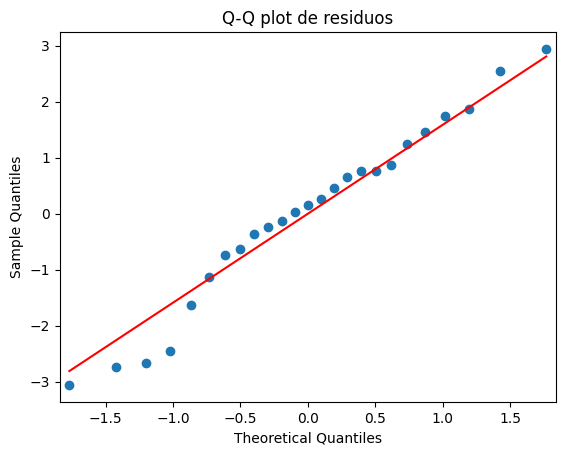

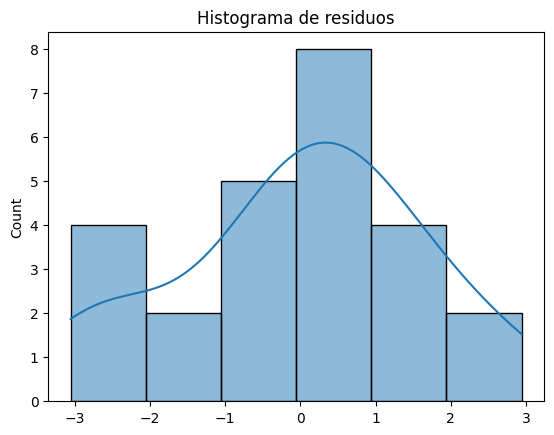

In [286]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05
# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No se rechaza ho, por lo tanto hay normalidad

In [287]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['silo'] == 'A']['temperatura']
grupo2 = df[df['silo'] == 'B']['temperatura']
grupo3 = df[df['silo'] == 'C']['temperatura']
grupo4 = df[df['silo'] == 'D']['temperatura']
grupo5 = df[df['silo'] == 'E']['temperatura']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.03273344760300815


Se rechaza ho, por lo tanto hay heteroscedasticidad

Lambda óptimo: 3.5182548686429325


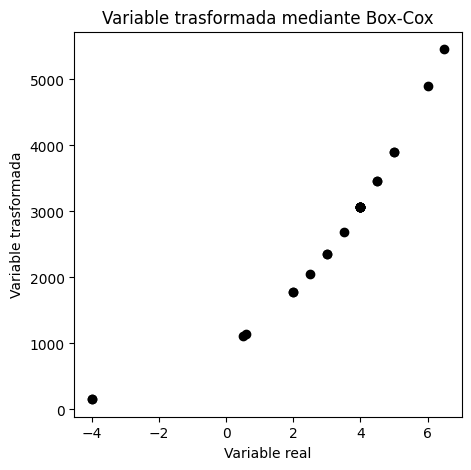

In [288]:
#si no se cumple con el supuesto de normalidad o de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0 ya que si lo hcemos con variables neg dara error
df["temperatura_boxcox"], lambda_opt = boxcox(df["temperatura"]+10) #le sumamos 10 para que no haya error
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["temperatura"], df["temperatura_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [289]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'temperatura_boxcox ~ C(silo) + C(dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre silos
#Hi: Hay diferencia significativa en al menos un silo
#Alpha: 0.05

sum_sq    df          F    PR(>F)
Intercept  2.633593e+07   1.0  23.414078  0.000181
C(silo)    1.162972e+07   4.0   2.584863  0.076762
C(dia)     8.251146e+06   4.0   1.833929  0.171671
Residual   1.799665e+07  16.0        NaN       NaN

No se rechaza ho en ambas variables, por lo tanto no hay diferencia significativa entre silos y entre dias.

valor-p (Shapiro) = 0.8744465691464234


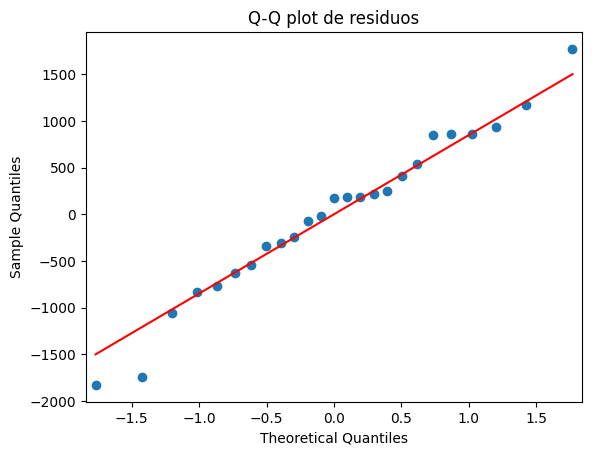

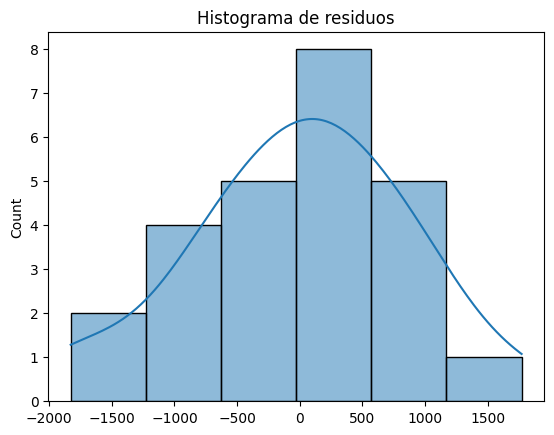

In [290]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05
# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No se rechaza ho, hay normalidad

In [291]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['silo'] == 'A']['temperatura_boxcox']
grupo2 = df[df['silo'] == 'B']['temperatura_boxcox']
grupo3 = df[df['silo'] == 'C']['temperatura_boxcox']
grupo4 = df[df['silo'] == 'D']['temperatura_boxcox']
grupo5 = df[df['silo'] == 'E']['temperatura_boxcox']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.7354442815123783


No se rechaza ho, hay homoscedasticidad

    Multiple Comparison of Means - Tukey HSD, FWER=0.50    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     A      B   641.3164  0.899  -535.4366 1818.0695  False
     A      C   -27.8567    1.0 -1204.6098 1148.8964  False
     A      D   720.5528 0.8547  -456.2003 1897.3059  False
     A      E -1182.8996  0.495 -2359.6527   -6.1465   True
     B      C  -669.1731 0.8844 -1845.9262    507.58  False
     B      D    79.2364    1.0 -1097.5167 1255.9894  False
     B      E  -1824.216 0.1262 -3000.9691  -647.463   True
     C      D   748.4095 0.8372  -428.3436 1925.1625  False
     C      E -1155.0429 0.5177  -2331.796   21.7102  False
     D      E -1903.4524 0.1029 -3080.2055 -726.6993   True
-----------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

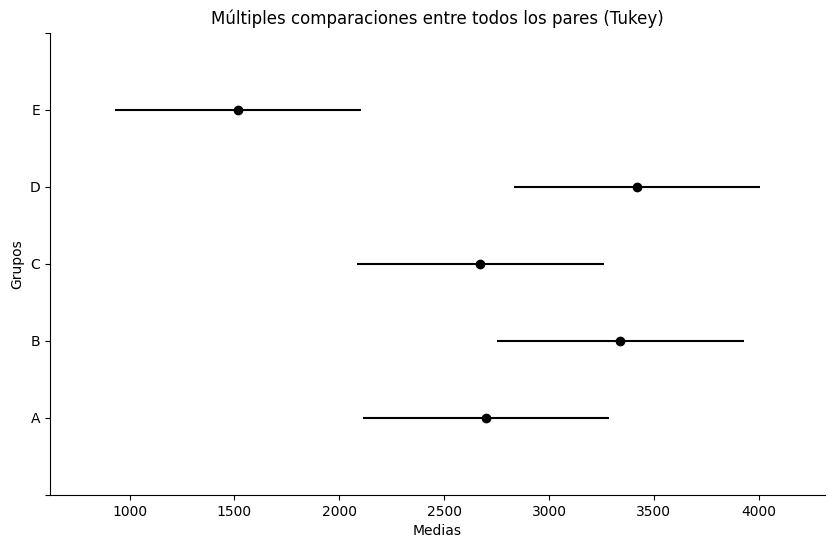

In [292]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['temperatura_boxcox'], groups=df['silo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

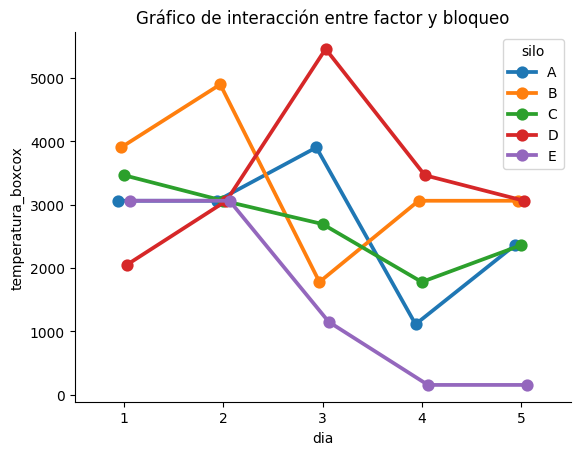

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="dia", y="temperatura_boxcox", hue="silo", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("dia")
plt.ylabel("temperatura_boxcox")
plt.legend(title="silo")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [294]:
df.groupby(["silo"])["temperatura_boxcox"].mean()

silo
A    2699.815331
B    3341.131758
C    2671.958645
D    3420.368119
E    1516.915732
Name: temperatura_boxcox, dtype: float64

In [295]:
modelo_lineal.params

Intercept       3079.112930
C(silo)[T.B]     641.316427
C(silo)[T.C]     -27.856686
C(silo)[T.D]     720.552789
C(silo)[T.E]   -1182.899598
C(dia)[T.2]      319.918795
C(dia)[T.3]     -112.054272
C(dia)[T.4]    -1194.493809
C(dia)[T.5]     -909.858711
dtype: float64

### problema 6e

In [296]:
import pandas as pd
from io import StringIO

data = '''
silo,dia,dif_temp
A,1,1.4
A,2,1.2
A,3,0.0
A,4,0.5
A,5,0.6
B,1,-1.4
B,2,-0.4
B,3,-0.3
B,4,-0.2
B,5,0.0
C,1,1.2
C,2,2.6
C,3,1.7
C,4,3.9
C,5,10.6
D,1,-0.6
D,2,-1.0
D,3,-0.1
D,4,1.8
D,5,0.0
E,1,4.0
E,2,0.5
E,3,-1.4
E,4,0.0
E,5,2.3
'''

df = pd.read_csv(StringIO(data))
df

silo  dia  dif_temp
0     A    1       1.4
1     A    2       1.2
2     A    3       0.0
3     A    4       0.5
4     A    5       0.6
5     B    1      -1.4
6     B    2      -0.4
7     B    3      -0.3
8     B    4      -0.2
9     B    5       0.0
10    C    1       1.2
11    C    2       2.6
12    C    3       1.7
13    C    4       3.9
14    C    5      10.6
15    D    1      -0.6
16    D    2      -1.0
17    D    3      -0.1
18    D    4       1.8
19    D    5       0.0
20    E    1       4.0
21    E    2       0.5
22    E    3      -1.4
23    E    4       0.0
24    E    5       2.3

In [297]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'dif_temp ~ C(silo) + C(dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre silos
#Hi: Hay diferencia significativa en al menos un silo
#Alpha: 0.05

sum_sq    df         F    PR(>F)
Intercept   0.947378   1.0  0.241453  0.629831
C(silo)    60.685600   4.0  3.866655  0.022039
C(dia)     20.621600   4.0  1.313930  0.306967
Residual   62.778400  16.0       NaN       NaN

Se rechaza ho, por lo tanto hay diferencia significativa entre silos

In [298]:
#Ho: No hay diferencia significativa entre días
#Hi: Hay diferencia significativa en al menos un día
#Alpha: 0.05

No se rechaza ho, por lo tanto no hay diferencia entre días.

valor-p (Shapiro) = 0.03540433379080545


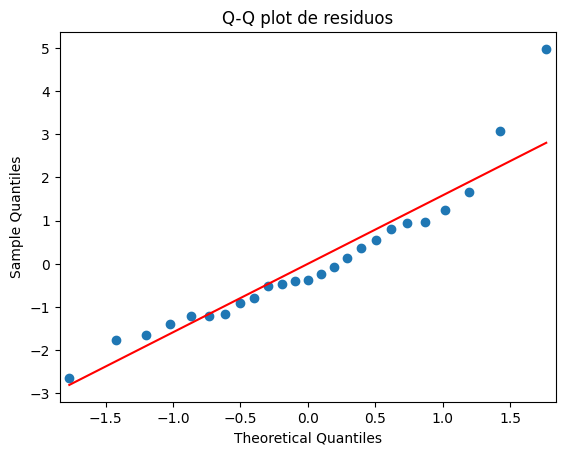

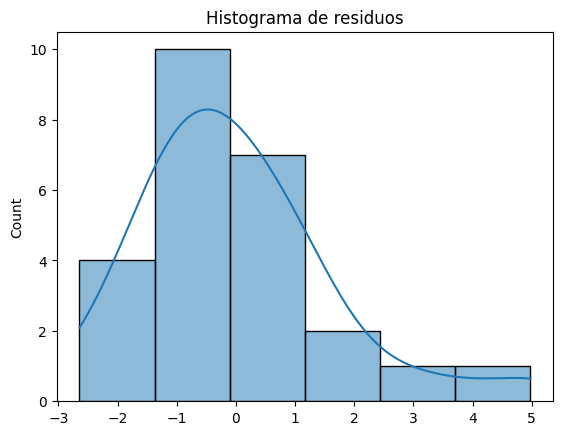

In [299]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05
# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

Se rechaza ho, no hay normalidad

In [300]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['silo'] == 'A']['dif_temp']
grupo2 = df[df['silo'] == 'B']['dif_temp']
grupo3 = df[df['silo'] == 'C']['dif_temp']
grupo4 = df[df['silo'] == 'D']['dif_temp']
grupo5 = df[df['silo'] == 'E']['dif_temp']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.27485379640035495


No se rechaza ho, por lo tanto hay homoscedasticidad

Lambda óptimo: -2.711329573992092


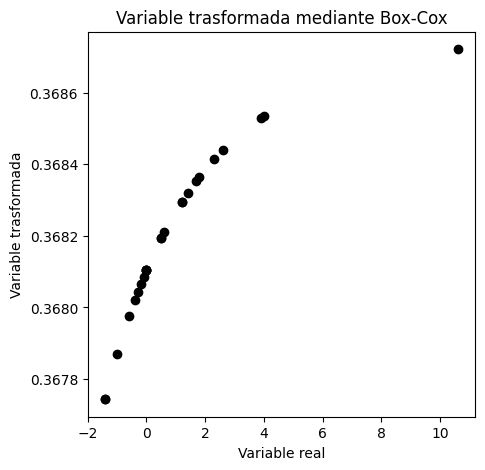

In [301]:
#si no se cumple con el supuesto de normalidad o de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0 ya que si lo hcemos con variables neg dara error
df["dif_temp_boxcox"], lambda_opt = boxcox(df["dif_temp"]+10) #le sumamos 10 para que no haya error
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["dif_temp"], df["dif_temp_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [302]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'dif_temp_boxcox ~ C(silo) + C(dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre silos
#Hi: Hay diferencia significativa en al menos un silo
#Alpha: 0.05

sum_sq    df             F        PR(>F)
Intercept  3.765980e-01   1.0  1.068744e+07  4.955225e-48
C(silo)    6.411500e-07   4.0  4.548785e+00  1.207715e-02
C(dia)     1.733562e-07   4.0  1.229916e+00  3.373799e-01
Residual   5.637988e-07  16.0           NaN           NaN

Hay diferencia entre silos pero no entre días.

valor-p (Shapiro) = 0.9872461243288846


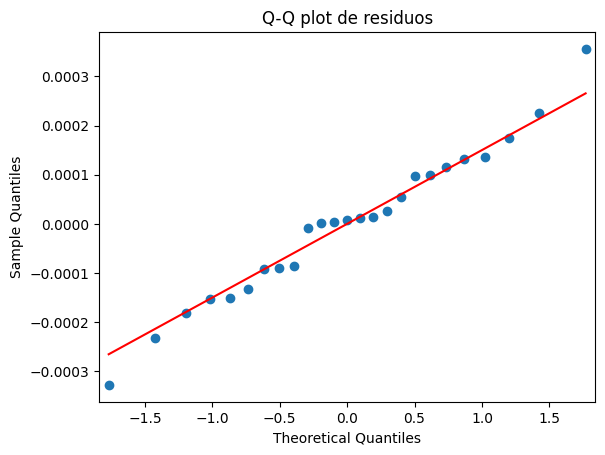

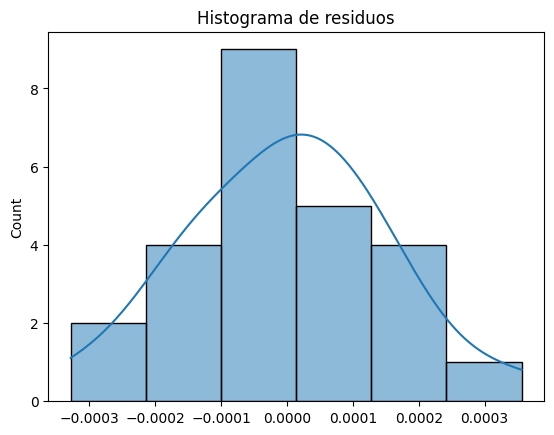

In [303]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05
# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

Ya hay normalidad

In [304]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['silo'] == 'A']['dif_temp_boxcox']
grupo2 = df[df['silo'] == 'B']['dif_temp_boxcox']
grupo3 = df[df['silo'] == 'C']['dif_temp_boxcox']
grupo4 = df[df['silo'] == 'D']['dif_temp_boxcox']
grupo5 = df[df['silo'] == 'E']['dif_temp_boxcox']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.3442659251399747


Hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B  -0.0002 0.3554 -0.0004    -0.0   True
     A      C   0.0002  0.302     0.0  0.0004   True
     A      D  -0.0001 0.7534 -0.0003  0.0001  False
     A      E     -0.0 0.9994 -0.0002  0.0002  False
     B      C   0.0005 0.0073  0.0003  0.0007   True
     B      D   0.0001 0.9561 -0.0001  0.0003  False
     B      E   0.0002 0.4753     0.0  0.0004   True
     C      D  -0.0004 0.0328 -0.0006 -0.0002   True
     C      E  -0.0003 0.2129 -0.0005 -0.0001   True
     D      E   0.0001  0.863 -0.0001  0.0003  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

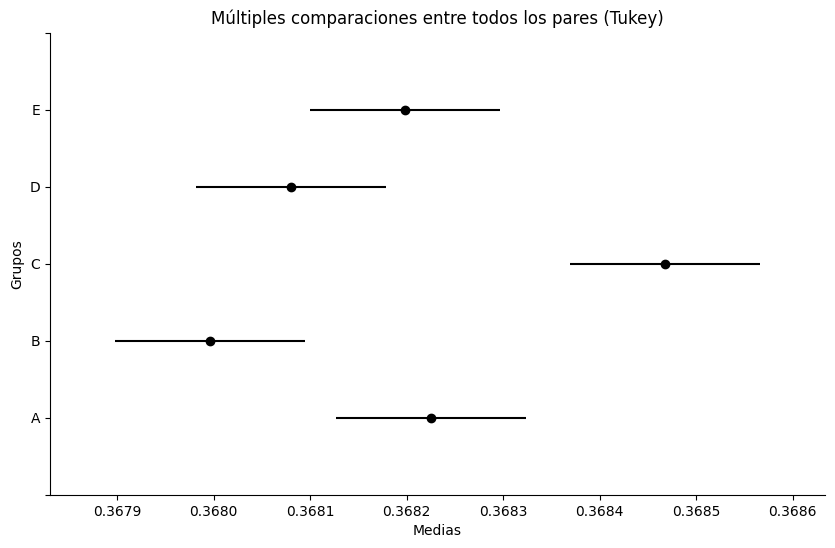

In [305]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['dif_temp_boxcox'], groups=df['silo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

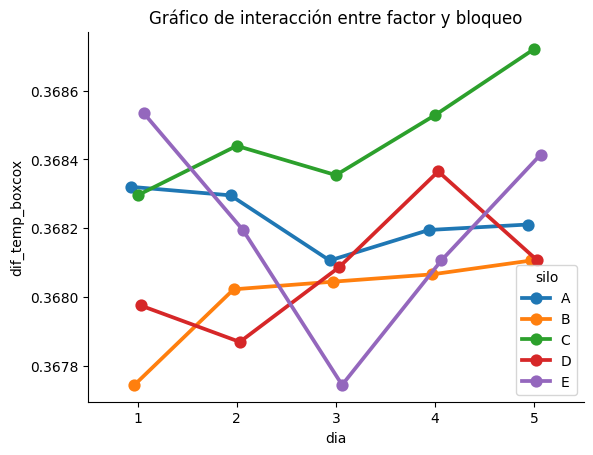

In [306]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="dia", y="dif_temp_boxcox", hue="silo", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("dia")
plt.ylabel("dif_temp_boxcox")
plt.legend(title="silo")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [307]:
df.groupby(["silo"])["dif_temp_boxcox"].mean()

silo
A    0.368225
B    0.367996
C    0.368468
D    0.368080
E    0.368199
Name: dif_temp_boxcox, dtype: float64

In [308]:
modelo_lineal.params

Intercept       0.368205
C(silo)[T.B]   -0.000229
C(silo)[T.C]    0.000243
C(silo)[T.D]   -0.000145
C(silo)[T.E]   -0.000027
C(dia)[T.2]    -0.000010
C(dia)[T.3]    -0.000107
C(dia)[T.4]     0.000078
C(dia)[T.5]     0.000138
dtype: float64

## Problema 7
Se quiere estudiar el efecto de cinco diferentes catalizadores (**A, B, C, D y E**) sobre el **tiempo de reacción** de un proceso químico. Cada lote de material sólo permite cinco corridas y cada corrida requiere aproximadamente 1.5 horas, por lo que sólo se pueden realizar cinco corridas diarias. El experimentador decide correr los experimentos con un diseño en cuadro latino para controlar activamente a los **lotes y días**. Los datos obtenidos son:

| Lote | Día 1 | Día 2 | Día 3 | Día 4 | Día 5 |
|------|-------|-------|-------|-------|-------|
| 1    | A = 8 | B = 7 | D = 1 | C = 7 | E = 3 |
| 2    | C = 11| E = 2 | A = 7 | D = 3 | B = 8 |
| 3    | B = 4 | A = 9 | C = 10| E = 1 | D = 5 |
| 4    | D = 6 | C = 8 | E = 6 | B = 6 | A = 10|
| 5    | E = 4 | D = 2 | B = 3 | A = 8 | C = 8 |


**Preguntas:**<br>
a) ¿Cómo se aleatorizó el experimento?  
b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.  
c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?  
d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?  
e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?  
f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.


In [309]:
import pandas as pd
from io import StringIO

data = '''
catalizador,tiempo,lote,dia
A,8,1,1
B,7,1,2
D,1,1,3
C,7,1,4
E,3,1,5
C,11,2,1
E,2,2,2
A,7,2,3
D,3,2,4
B,8,2,5
B,4,3,1
A,9,3,2
C,10,3,3
E,1,3,4
D,5,3,5
D,6,4,1
C,8,4,2
E,6,4,3
B,6,4,4
A,10,4,5
E,4,5,1
D,2,5,2
B,3,5,3
A,8,5,4
C,8,5,5
'''

df = pd.read_csv(StringIO(data))
df

catalizador  tiempo  lote  dia
0            A       8     1    1
1            B       7     1    2
2            D       1     1    3
3            C       7     1    4
4            E       3     1    5
5            C      11     2    1
6            E       2     2    2
7            A       7     2    3
8            D       3     2    4
9            B       8     2    5
10           B       4     3    1
11           A       9     3    2
12           C      10     3    3
13           E       1     3    4
14           D       5     3    5
15           D       6     4    1
16           C       8     4    2
17           E       6     4    3
18           B       6     4    4
19           A      10     4    5
20           E       4     5    1
21           D       2     5    2
22           B       3     5    3
23           A       8     5    4
24           C       8     5    5

In [310]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'tiempo ~ C(catalizador) + C(lote) + C(dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre catalizadores
#Hi: Hay diferencia significativa en al menos un catalizador
#Alpha: 0.05

sum_sq    df          F    PR(>F)
Intercept       136.987692   1.0  43.812695  0.000025
C(catalizador)  141.440000   4.0  11.309168  0.000488
C(lote)          15.440000   4.0   1.234542  0.347618
C(dia)           12.240000   4.0   0.978678  0.455014
Residual         37.520000  12.0        NaN       NaN

Se rechaza ho, por lo tanto hay diferencia significativa em al menos un catalizador.

In [311]:
#Ho: No hay diferencia significativa entre lotes
#Hi: Hay diferencia significativa en al menos un lote
#Alpha: 0.05

No se rechaza ho, por lo tanto no hay diferencia significativa entre lotes.

In [312]:
#Ho: No hay diferencia significativa entre dias
#Hi: Hay diferencia significativa en al menos un dia
#Alpha: 0.05

No se rechaza ho, por lo tanto no hay diferencia significativa entre días.

valor-p (Shapiro) = 0.5476371878727828


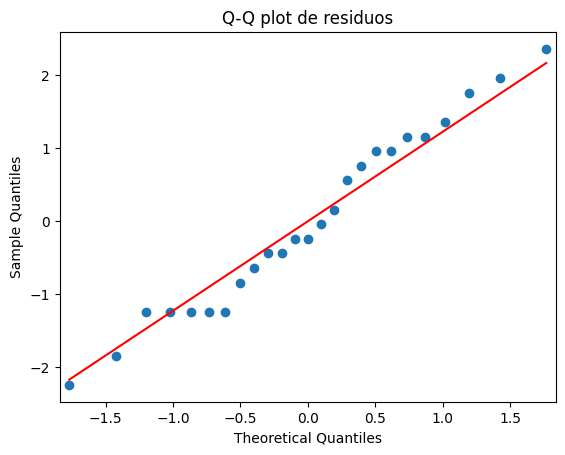

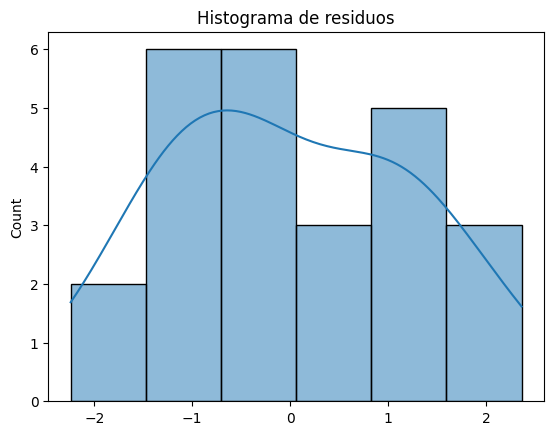

In [313]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No se rechaza ho, por lo tanto hay normalidad

In [314]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['catalizador'] == "A"]['tiempo']
grupo2 = df[df['catalizador'] == "B"]['tiempo']
grupo3 = df[df['catalizador'] == "C"]['tiempo']
grupo4 = df[df['catalizador'] == "D"]['tiempo']
grupo5 = df[df['catalizador'] == "E"]['tiempo']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.7751009409046274


No se rechaza ho, por lo tanto hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1423 -4.6547 -0.9453   True
     A      C      0.4 0.9965 -1.4547  2.2547  False
     A      D     -5.0 0.0024 -6.8547 -3.1453   True
     A      E     -5.2 0.0016 -7.0547 -3.3453   True
     B      C      3.2 0.0733  1.3453  5.0547   True
     B      D     -2.2 0.3361 -4.0547 -0.3453   True
     B      E     -2.4 0.2578 -4.2547 -0.5453   True
     C      D     -5.4 0.0011 -7.2547 -3.5453   True
     C      E     -5.6 0.0007 -7.4547 -3.7453   True
     D      E     -0.2 0.9998 -2.0547  1.6547  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

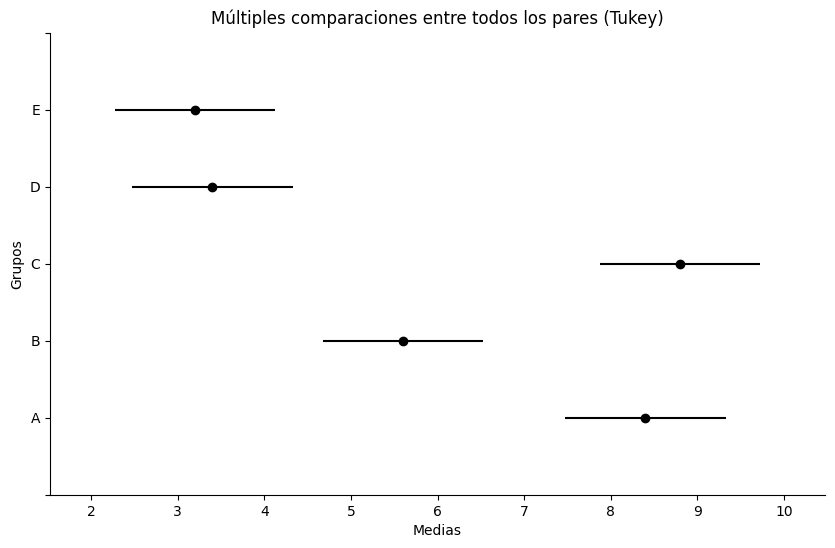

In [315]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['catalizador'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Hay diferencia significativa entre catalizadores, podemos observar que el catalizador D y E no tienen diferencia, asi como el A y el C. Asi que se puede decir que se forman 3 grupos

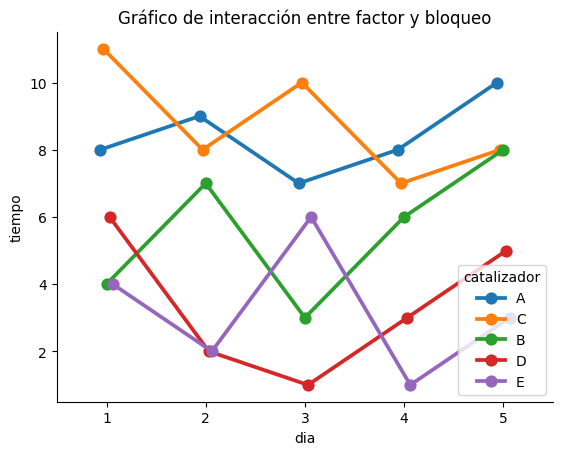

In [316]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="dia", y="tiempo", hue="catalizador", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("dia")
plt.ylabel("tiempo")
plt.legend(title="catalizador")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [317]:
df.groupby(["catalizador"])["tiempo"].mean()

catalizador
A    8.4
B    5.6
C    8.8
D    3.4
E    3.2
Name: tiempo, dtype: float64

In [318]:
modelo_lineal.params

Intercept              8.44
C(catalizador)[T.B]   -2.80
C(catalizador)[T.C]    0.40
C(catalizador)[T.D]   -5.00
C(catalizador)[T.E]   -5.20
C(lote)[T.2]           1.00
C(lote)[T.3]           0.60
C(lote)[T.4]           2.00
C(lote)[T.5]          -0.20
C(dia)[T.2]           -1.00
C(dia)[T.3]           -1.20
C(dia)[T.4]           -1.60
C(dia)[T.5]            0.20
dtype: float64

## Problema 8
En el problema anterior elimine el factor de bloque días, y conteste:

a) ¿Se justifica la eliminación?  
b) Sin tomar en cuenta el día, señale el nombre del diseño, el modelo y las hipótesis más adecuadas al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y del anterior?


In [319]:
import pandas as pd
from io import StringIO

data = '''
catalizador,tiempo,lote
A,8,1
B,7,1
D,1,1
C,7,1
E,3,1
C,11,2
E,2,2
A,7,2
D,3,2
B,8,2
B,4,3
A,9,3
C,10,3
E,1,3
D,5,3
D,6,4
C,8,4
E,6,4
B,6,4
A,10,4
E,4,5
D,2,5
B,3,5
A,8,5
C,8,5
'''

df = pd.read_csv(StringIO(data))
df

catalizador  tiempo  lote
0            A       8     1
1            B       7     1
2            D       1     1
3            C       7     1
4            E       3     1
5            C      11     2
6            E       2     2
7            A       7     2
8            D       3     2
9            B       8     2
10           B       4     3
11           A       9     3
12           C      10     3
13           E       1     3
14           D       5     3
15           D       6     4
16           C       8     4
17           E       6     4
18           B       6     4
19           A      10     4
20           E       4     5
21           D       2     5
22           B       3     5
23           A       8     5
24           C       8     5

In [320]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'tiempo ~ C(catalizador) + C(lote)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre catalizadores
#Hi: Hay diferencia significativa en al menos un catalizador
#Alpha: 0.05

sum_sq    df          F    PR(>F)
Intercept       165.551111   1.0  53.231869  0.000002
C(catalizador)  141.440000   4.0  11.369775  0.000146
C(lote)          15.440000   4.0   1.241158  0.333144
Residual         49.760000  16.0        NaN       NaN

Se rechaza ho. Hay diferencia significativa entre catalizadores o al menos en uno de ellos. Hay relación entre variables.

In [321]:
#Ho: No hay diferencia significativa entre lotes
#Hi: Hay diferencia significativa en al menos un lote
#Alpha: 0.05

No se rechaza ho. No hay relación ni hay diferencia significativa entre lotes.

valor-p (Shapiro) = 0.042461843899350496


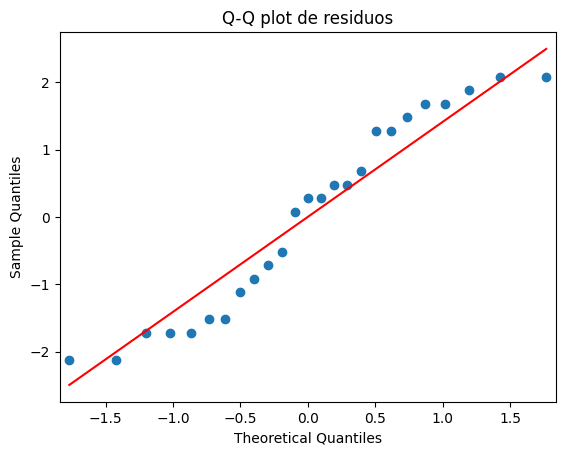

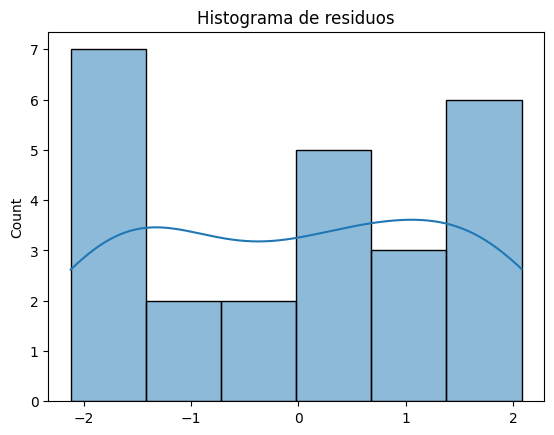

In [322]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

Se rechaza ho, no hay normalidad

In [323]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['catalizador'] == "A"]['tiempo']
grupo2 = df[df['catalizador'] == "B"]['tiempo']
grupo3 = df[df['catalizador'] == "C"]['tiempo']
grupo4 = df[df['catalizador'] == "D"]['tiempo']
grupo5 = df[df['catalizador'] == "E"]['tiempo']
stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.7751009409046274


No se rechaza ho. Hay homoscedasticidad

Lambda óptimo: 0.8614779727199691


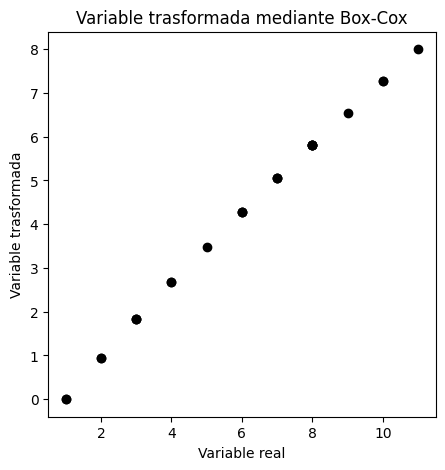

In [324]:
#si no se cumple con el supuesto de normalidad o de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0 ya que si lo hcemos con variables neg dara error
df["tiempo_boxcox"], lambda_opt = boxcox(df["tiempo"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["tiempo"], df["tiempo_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [325]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'tiempo_boxcox ~ C(catalizador) + C(lote)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre catalizadores
#Hi: Hay diferencia significativa en al menos un catalizador
#Alpha: 0.05

sum_sq    df          F    PR(>F)
Intercept       85.480137   1.0  41.775555  0.000008
C(catalizador)  89.225448   4.0  10.901488  0.000185
C(lote)         10.054729   4.0   1.228478  0.337925
Residual        32.738815  16.0        NaN       NaN

Hay diferencia entre catalizadores pero no entre lotes

valor-p (Shapiro) = 0.06942314577334534


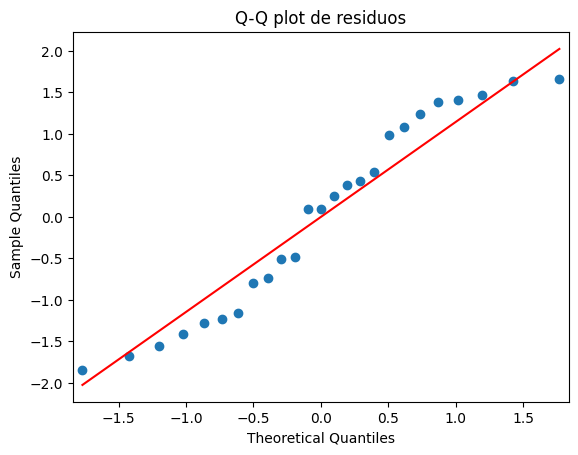

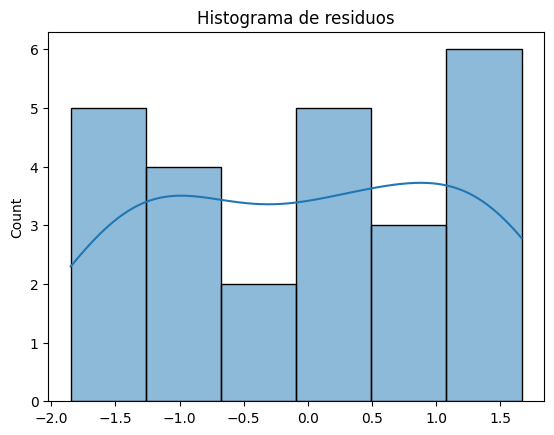

In [326]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No se rechaza ho, hay normalidad

In [327]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['catalizador'] == "A"]['tiempo_boxcox']
grupo2 = df[df['catalizador'] == "B"]['tiempo_boxcox']
grupo3 = df[df['catalizador'] == "C"]['tiempo_boxcox']
grupo4 = df[df['catalizador'] == "D"]['tiempo_boxcox']
grupo5 = df[df['catalizador'] == "E"]['tiempo_boxcox']
stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.6436506564139076


No se rechaza ho, hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B  -2.1698 0.1719 -3.6724 -0.6673   True
     A      C   0.2908 0.9977 -1.2117  1.7934  False
     A      D   -3.987 0.0028 -5.4896 -2.4845   True
     A      E  -4.1494 0.0019  -5.652 -2.6469   True
     B      C   2.4607 0.0967  0.9581  3.9632   True
     B      D  -1.8172 0.3181 -3.3197 -0.3146   True
     B      E  -1.9796 0.2426 -3.4822 -0.4771   True
     C      D  -4.2779 0.0014 -5.7804 -2.7753   True
     C      E  -4.4403 0.0009 -5.9428 -2.9377   True
     D      E  -0.1624 0.9998  -1.665  1.3401  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

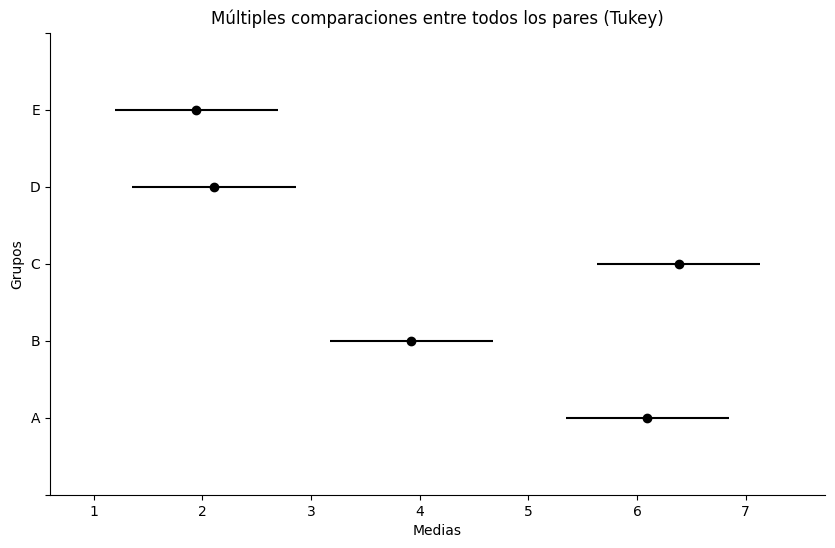

In [328]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo_boxcox'], groups=df['catalizador'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

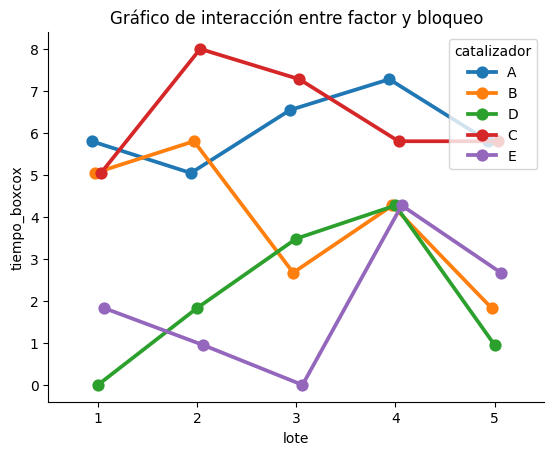

In [329]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="lote", y="tiempo_boxcox", hue="catalizador", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("lote")
plt.ylabel("tiempo_boxcox")
plt.legend(title="catalizador")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [330]:
df.groupby(["catalizador"])["tiempo_boxcox"].mean()

catalizador
A    6.093956
B    3.924118
C    6.384795
D    2.106944
E    1.944506
Name: tiempo_boxcox, dtype: float64

In [331]:
modelo_lineal.params

Intercept              5.547328
C(catalizador)[T.B]   -2.169838
C(catalizador)[T.C]    0.290839
C(catalizador)[T.D]   -3.987012
C(catalizador)[T.E]   -4.149450
C(lote)[T.2]           0.780503
C(lote)[T.3]           0.451063
C(lote)[T.4]           1.635363
C(lote)[T.5]          -0.133790
dtype: float64

## Problema 9
Con respecto a los problemas 7 y 8, además de eliminar el factor día ahora elimine el factor lote, y conteste lo siguiente:

a) ¿Se justifica esta segunda eliminación en ambos problemas?  
b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error obtenido con los de los problemas 16 y 17. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?  
f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?  


In [332]:
import pandas as pd
from io import StringIO

data = '''
catalizador,tiempo
A,8
B,7
D,1
C,7
E,3
C,11
E,2
A,7
D,3
B,8
B,4
A,9
C,10
E,1
D,5
D,6
C,8
E,6
B,6
A,10
E,4
D,2
B,3
A,8
C,8
'''

df = pd.read_csv(StringIO(data))
df

catalizador  tiempo
0            A       8
1            B       7
2            D       1
3            C       7
4            E       3
5            C      11
6            E       2
7            A       7
8            D       3
9            B       8
10           B       4
11           A       9
12           C      10
13           E       1
14           D       5
15           D       6
16           C       8
17           E       6
18           B       6
19           A      10
20           E       4
21           D       2
22           B       3
23           A       8
24           C       8

In [333]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('tiempo ~ C(catalizador)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables
#Hi: si hay relación entre variables
#alpha= 0.05

df  sum_sq  mean_sq          F    PR(>F)
C(catalizador)   4.0  141.44    35.36  10.846626  0.000077
Residual        20.0   65.20     3.26        NaN       NaN

Se rechaza ho, por lo tanto hay relación entre variables, y al menos un catalizador es diferente.

valor-p (Shapiro) = 0.29334160847597607


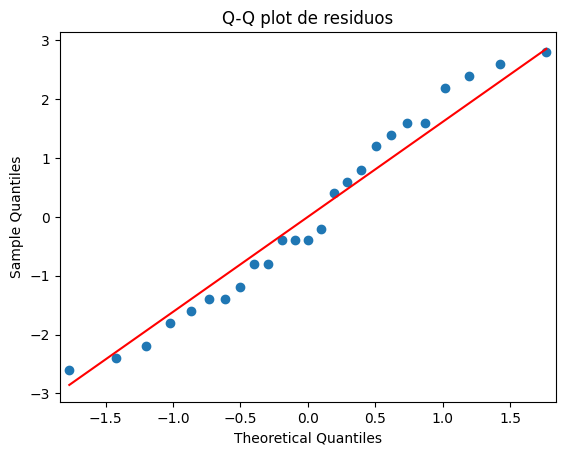

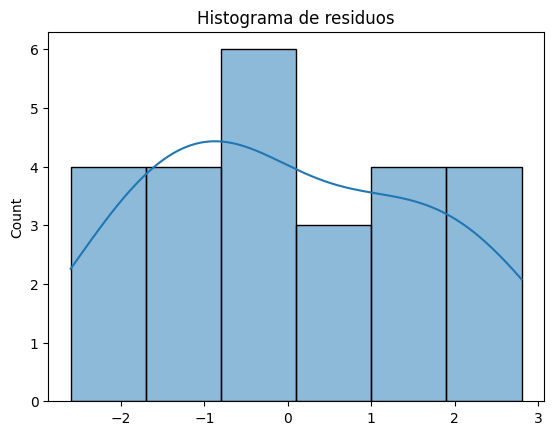

In [334]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No se rechaza ho, por lo tanto hay normalidad

In [335]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['catalizador'] == 'A']['tiempo']
grupo2 = df[df['catalizador'] == 'B']['tiempo']
grupo3 = df[df['catalizador'] == 'C']['tiempo']
grupo4 = df[df['catalizador'] == 'D']['tiempo']
grupo5 = df[df['catalizador'] == 'E']['tiempo']
stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.7751009409046274


No se rechaza ho, por lo tanto hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1423 -6.2171  0.6171  False
     A      C      0.4 0.9965 -3.0171  3.8171  False
     A      D     -5.0 0.0024 -8.4171 -1.5829   True
     A      E     -5.2 0.0016 -8.6171 -1.7829   True
     B      C      3.2 0.0733 -0.2171  6.6171  False
     B      D     -2.2 0.3361 -5.6171  1.2171  False
     B      E     -2.4 0.2578 -5.8171  1.0171  False
     C      D     -5.4 0.0011 -8.8171 -1.9829   True
     C      E     -5.6 0.0007 -9.0171 -2.1829   True
     D      E     -0.2 0.9998 -3.6171  3.2171  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

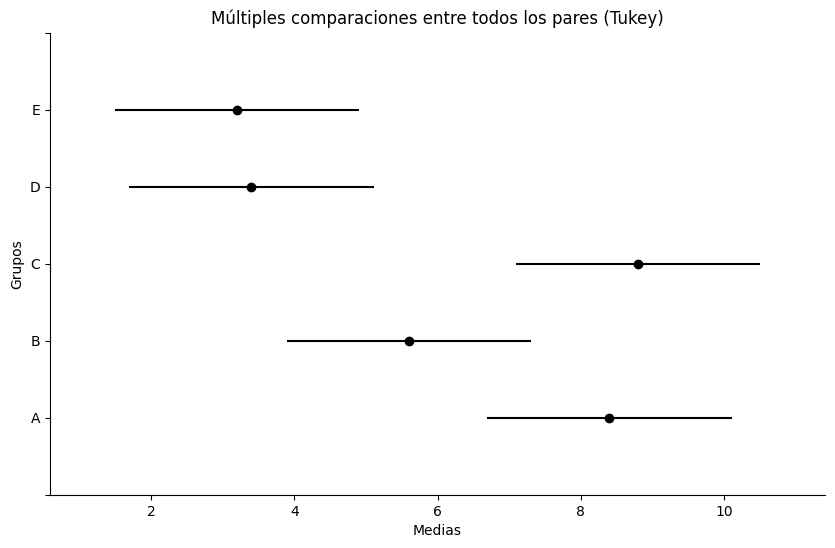

In [336]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['catalizador'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

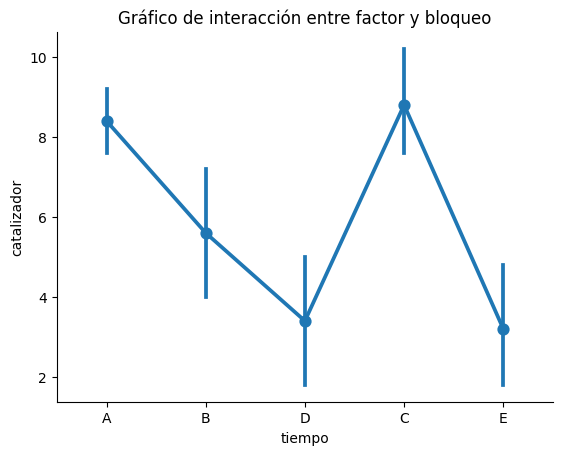

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="catalizador", y="tiempo", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("tiempo")
plt.ylabel("catalizador")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [338]:
df.groupby(["catalizador"])["tiempo"].mean()

catalizador
A    8.4
B    5.6
C    8.8
D    3.4
E    3.2
Name: tiempo, dtype: float64

In [339]:
modelo_lineal.params

Intercept              8.4
C(catalizador)[T.B]   -2.8
C(catalizador)[T.C]    0.4
C(catalizador)[T.D]   -5.0
C(catalizador)[T.E]   -5.2
dtype: float64

Nos podriamos quedar con los metodos E y D. ya que son los mejores tratamientos con menor tiempo de reacción.

## Problema 10
Se comprueba el peso en gramos de un material de tres proveedores: **A, B y C**, por tres diferentes inspectores: **I, II y III**, utilizando tres diferentes escalas: **1, 2 y 3**. El experimento se lleva a cabo como el siguiente cuadro latino:

| Inspector | Escala 1 | Escala 2 | Escala 3 |
|-----------|----------|----------|----------|
| I         | A = 16   | B = 10   | C = 11   |
| II        | B = 15   | C = 9    | A = 14   |
| III       | C = 13   | A = 11   | B = 13   |

**Preguntas:**<br>
a) ¿Hay diferencias entre los proveedores?  
b) ¿Hay diferencias entre los inspectores y entre las escalas?  
c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?  
d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.  


In [340]:
import pandas as pd
from io import StringIO

data = '''
inspector,escala,proveedor,gramos
I,1,A,16
I,2,B,10
I,3,C,11
II,1,B,15
II,2,C,9
II,3,A,14
III,1,C,13
III,2,A,11
III,3,B,13
'''

df = pd.read_csv(StringIO(data))
df

inspector  escala proveedor  gramos
0         I       1         A      16
1         I       2         B      10
2         I       3         C      11
3        II       1         B      15
4        II       2         C       9
5        II       3         A      14
6       III       1         C      13
7       III       2         A      11
8       III       3         B      13

In [341]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'gramos ~ C(proveedor) + C(inspector) + C(escala)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre proveedores
#Hi: Hay diferencia significativa en al menos un proveedor
#Alpha: 0.05

sum_sq   df            F    PR(>F)
Intercept     320.063492  1.0  2880.571429  0.000347
C(proveedor)   10.888889  2.0    49.000000  0.020000
C(inspector)    0.222222  2.0     1.000000  0.500000
C(escala)      32.888889  2.0   148.000000  0.006711
Residual        0.222222  2.0          NaN       NaN

Se rechaza ho, por lo tanto si hay diferencia significativa en al menos un proveedor

In [342]:
#Ho: No hay diferencia significativa entre inspectores
#Hi: Hay diferencia significativa en al menos un inspector
#Alpha: 0.05

No se rechaza ho, por lo tanto no hay diferencia significativa entre inspectores

In [343]:
#Ho: No hay diferencia significativa entre escalas
#Hi: Hay diferencia significativa en al menos una escala
#Alpha: 0.05

Se rechaza ho, por lo tanto si hay diferencia significativa entre escalas o al menos en una de ellas.

valor-p (Shapiro) = 0.0001525914707022121


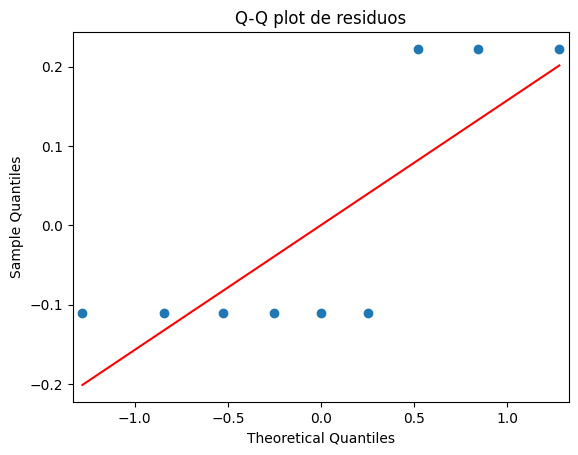

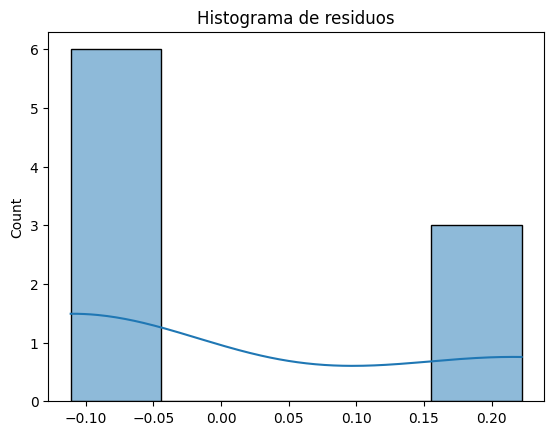

In [344]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

Se rechaza ho, no hay normalidad

In [345]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['proveedor'] == "A"]['gramos']
grupo2 = df[df['proveedor'] == "B"]['gramos']
grupo3 = df[df['proveedor'] == "C"]['gramos']
stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.946440270473328


No se rechaza ho, hay homoscedasticidad

Lambda óptimo: 0.6036200947197173


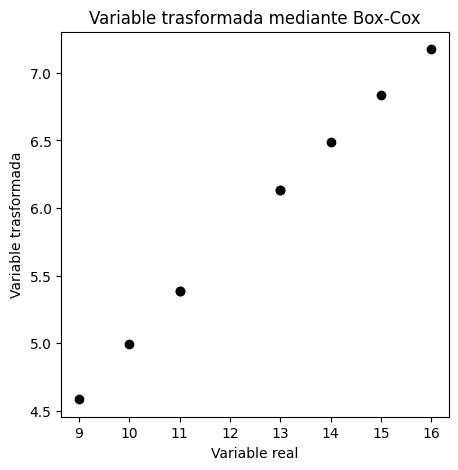

In [346]:
#si no se cumple con el supuesto de normalidad o de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0 ya que si lo hcemos con variables neg dara error
df["gramos_boxcox"], lambda_opt = boxcox(df["gramos"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["gramos"], df["gramos_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [347]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'gramos_boxcox ~ C(proveedor) + C(inspector) + C(escala)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre proveedores
#Hi: Hay diferencia significativa en al menos un proveedor
#Alpha: 0.05

sum_sq   df            F    PR(>F)
Intercept     65.064822  1.0  7590.149990  0.000132
C(proveedor)   1.481484  2.0    86.411381  0.011440
C(inspector)   0.022529  2.0     1.314039  0.432145
C(escala)      4.523676  2.0   263.855181  0.003776
Residual       0.017145  2.0          NaN       NaN

Hay diferencia significativa en al menos un proveedor y una escala
No hay diferencia significativa entre inspectores

valor-p (Shapiro) = 0.00023166342041779528


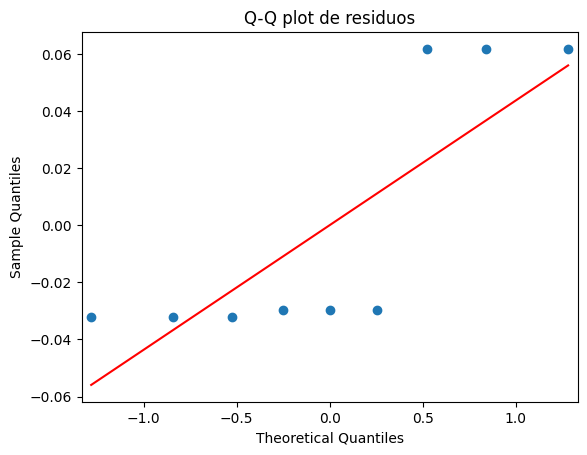

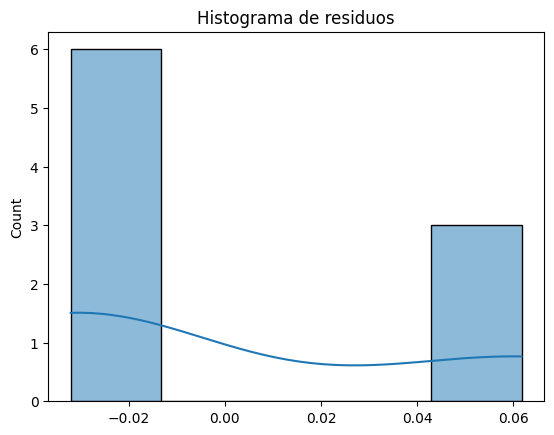

In [348]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No hay normalidad

In [349]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['proveedor'] == "A"]['gramos_boxcox']
grupo2 = df[df['proveedor'] == "B"]['gramos_boxcox']
grupo3 = df[df['proveedor'] == "C"]['gramos_boxcox']
stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.9718373474994288


Hay homoscedasticidad

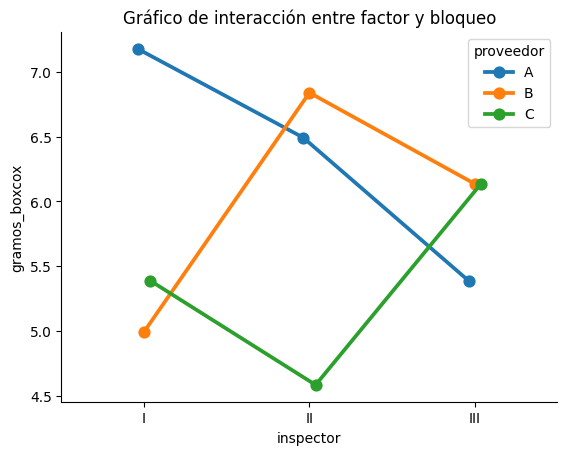

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="inspector", y="gramos_boxcox", hue="proveedor", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("inspector")
plt.ylabel("gramos_boxcox")
plt.legend(title="proveedor")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [351]:
df.groupby(["proveedor"])["gramos_boxcox"].mean()

proveedor
A    6.351577
B    5.988993
C    5.368947
Name: gramos_boxcox, dtype: float64

In [352]:
modelo_lineal.params

Intercept              7.113788
C(proveedor)[T.B]     -0.362584
C(proveedor)[T.C]     -0.982629
C(inspector)[T.II]     0.118866
C(inspector)[T.III]    0.033599
C(escala)[T.2]        -1.727663
C(escala)[T.3]        -0.711435
dtype: float64

### problema 10.1

In [353]:
import pandas as pd
from io import StringIO

data = '''
escala,proveedor,gramos
1,A,16
2,B,10
3,C,11
1,B,15
2,C,9
3,A,14
1,C,13
2,A,11
3,B,13
'''

df = pd.read_csv(StringIO(data))
df

escala proveedor  gramos
0       1         A      16
1       2         B      10
2       3         C      11
3       1         B      15
4       2         C       9
5       3         A      14
6       1         C      13
7       2         A      11
8       3         B      13

In [354]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'gramos ~ C(proveedor) + C(escala)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#Ho: No hay diferencia significativa entre grupos
#Hi: Hay diferencia significativa en al menos un grupo
#Alpha: 0.05

sum_sq   df      F    PR(>F)
C(proveedor)  10.888889  2.0   49.0  0.001538
C(escala)     32.888889  2.0  148.0  0.000178
Residual       0.444444  4.0    NaN       NaN

Se rechaza ho para ambas variables, es decir que al menos un proveedor y al menos una escala es diferente.

valor-p (Shapiro) = 0.023534081640278297


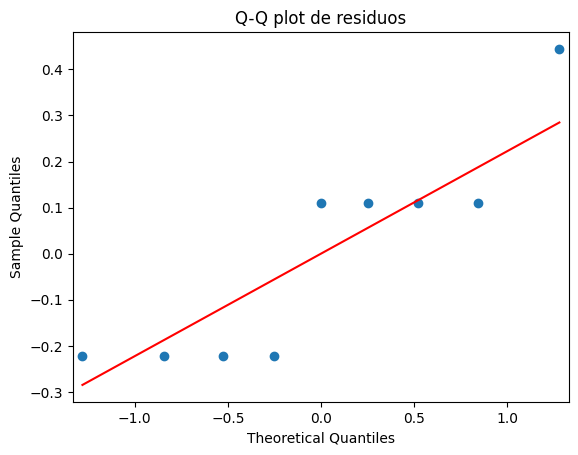

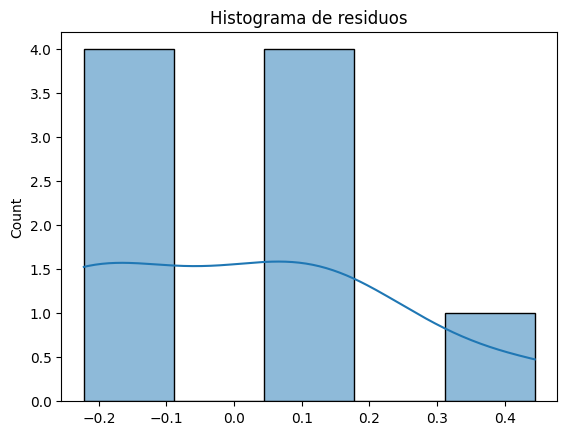

In [355]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
# ho. hay normalidad
# hi. no hay normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

Se rechaza ho, no hay normalidad

In [356]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['proveedor'] == 'A']['gramos']
grupo2 = df[df['proveedor'] == 'B']['gramos']
grupo3 = df[df['proveedor'] == 'C']['gramos']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.946440270473328


No se rechaza ho, hay homoscedasticidad

Lambda óptimo: 0.6036200947197173


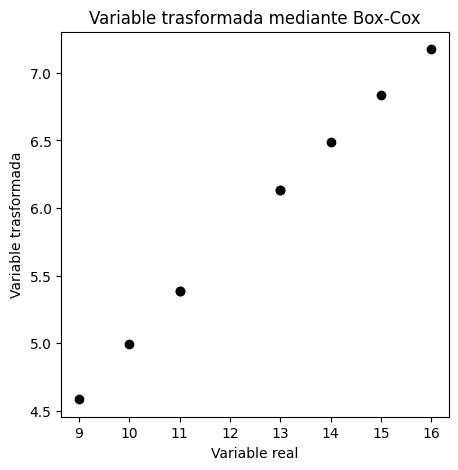

In [357]:
#si no se cumple con el supuesto de normalidad o de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0 ya que si lo hcemos con variables neg dara error
df["gramos_boxcox"], lambda_opt = boxcox(df["gramos"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["gramos"], df["gramos_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [358]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'gramos_boxcox ~ C(proveedor) + C(escala)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#Ho: No hay diferencia significativa entre grupos
#Hi: Hay diferencia significativa en al menos un grupo
#Alpha: 0.05

sum_sq   df           F    PR(>F)
C(proveedor)  1.481484  2.0   74.684475  0.000680
C(escala)     4.523676  2.0  228.047339  0.000076
Residual      0.039673  4.0         NaN       NaN

Hay diferencia en al menos un proveedor y en al menos una escala.

valor-p (Shapiro) = 0.38320787878650936


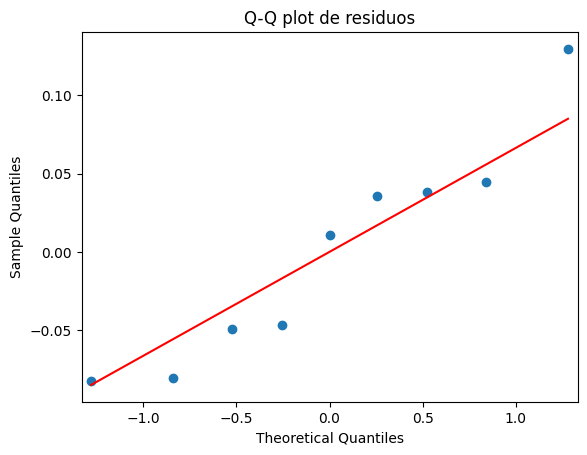

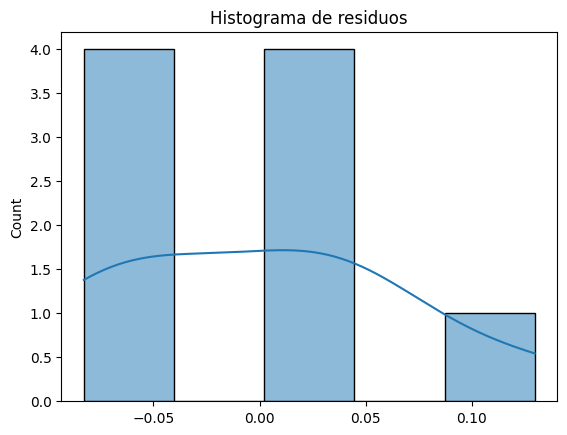

In [359]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
# ho. hay normalidad
# hi. no hay normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

Ya hay normalidad

In [360]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['proveedor'] == 'A']['gramos_boxcox']
grupo2 = df[df['proveedor'] == 'B']['gramos_boxcox']
grupo3 = df[df['proveedor'] == 'C']['gramos_boxcox']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.9718373474994288


Hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B  -0.3626 0.8697 -1.2107  0.4856  False
     A      C  -0.9826 0.4077 -1.8308 -0.1345   True
     B      C    -0.62 0.6766 -1.4682  0.2281  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

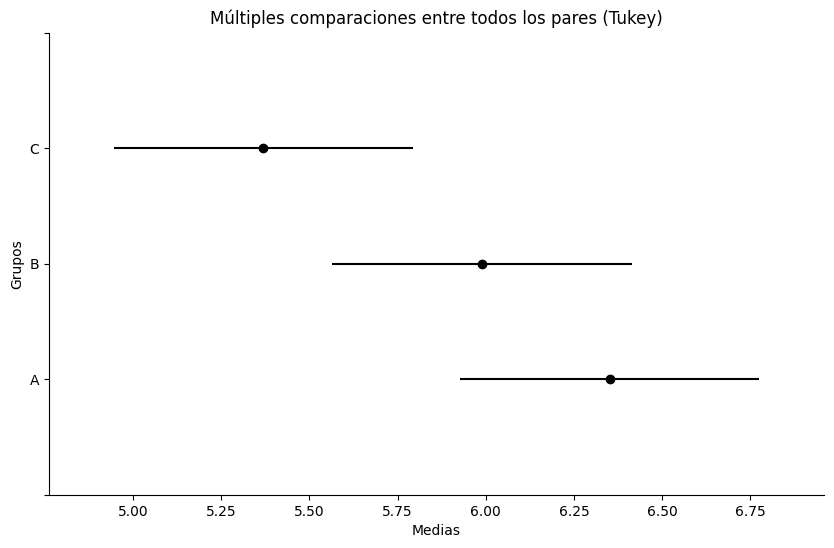

In [361]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['gramos_boxcox'], groups=df['proveedor'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

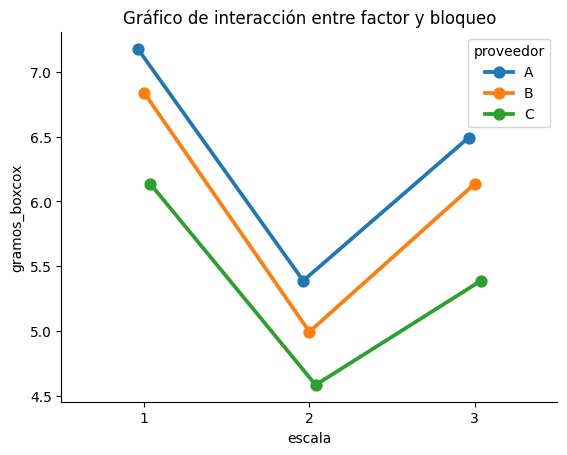

In [362]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="escala", y="gramos_boxcox", hue="proveedor", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("escala")
plt.ylabel("gramos_boxcox")
plt.legend(title="proveedor")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [363]:
df.groupby(["proveedor"])["gramos_boxcox"].mean()

proveedor
A    6.351577
B    5.988993
C    5.368947
Name: gramos_boxcox, dtype: float64

In [364]:
modelo_lineal.params

Intercept            7.164609
C(proveedor)[T.B]   -0.362584
C(proveedor)[T.C]   -0.982629
C(escala)[T.2]      -1.727663
C(escala)[T.3]      -0.711435
dtype: float64

## Problema 11
Cuando se comparan varios fertilizantes o diferentes variedades de cierto cultivo, es típico que se deba considerar el gradiente de fertilidad del suelo (factor columna) o los efectos residuales de cultivos previos (factor renglón). Considerando estos factores de bloque, Gomez y Gomez (1984) plantean un experimento en cuadro latino para comparar, en cuanto a rendimiento en toneladas por hectárea, tres variedades de maíz híbrido (**A, B, C**) y una variedad control (**D**). Para ello, se utiliza un campo agrícola cuadrado de 16 hectáreas, dividido en parcelas de una hectárea. Los datos de rendimiento obtenidos en cada parcela se muestran a continuación:

| Ren\Col | 1       | 2       | 3       | 4       |
|---------|---------|---------|---------|---------|
| 1       | 1.640(B)| 1.210(D)| 1.425(C)| 1.345(A)|
| 2       | 1.475(C)| 1.185(A)| 1.400(D)| 1.290(B)|
| 3       | 1.670(A)| 0.710(C)| 1.665(B)| 1.180(D)|
| 4       | 1.565(D)| 1.290(B)| 1.655(A)| 0.660(C)|

**Preguntas y ejercicios:**<br>
a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?  
b) ¿Cuál de los factores de bloque tuvo efectos?  
c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?  
d) ¿Y con un diseño en bloques completos al azar?  


In [365]:
import pandas as pd
from io import StringIO

data = '''
rendimiento,maiz,cultivo,fertilidad
1.640,B,1,1
1.210,D,1,2
1.425,C,1,3
1.345,A,1,4
1.475,C,2,1
1.185,A,2,2
1.400,D,2,3
1.290,B,2,4
1.670,A,3,1
0.710,C,3,2
1.665,B,3,3
1.180,D,3,4
1.565,D,4,1
1.290,B,4,2
1.655,A,4,3
0.660,C,4,4
'''

df = pd.read_csv(StringIO(data))
df

rendimiento maiz  cultivo  fertilidad
0         1.640    B        1           1
1         1.210    D        1           2
2         1.425    C        1           3
3         1.345    A        1           4
4         1.475    C        2           1
5         1.185    A        2           2
6         1.400    D        2           3
7         1.290    B        2           4
8         1.670    A        3           1
9         0.710    C        3           2
10        1.665    B        3           3
11        1.180    D        3           4
12        1.565    D        4           1
13        1.290    B        4           2
14        1.655    A        4           3
15        0.660    C        4           4

In [366]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'rendimiento ~ C(maiz) + C(cultivo) + C(fertilidad)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre maizes
#Hi: Hay diferencia significativa en al menos un maiz
#Alpha: 0.05

sum_sq   df           F    PR(>F)
Intercept      5.101531  1.0  236.210452  0.000005
C(maiz)        0.426842  3.0    6.587865  0.025092
C(cultivo)     0.030155  3.0    0.465406  0.716972
C(fertilidad)  0.827342  3.0   12.769166  0.005148
Residual       0.129584  6.0         NaN       NaN

Se rechaza ho, por lo tanto hay diferencia significativa en al menos un maiz

In [367]:
#Ho: No hay diferencia significativa entre renglones
#Hi: Hay diferencia significativa en al menos un renglon
#Alpha: 0.05

No se rechaza ho, por lo tanto no hay diferencia significativa entre cultivos (factor renglon)

In [368]:
#Ho: No hay diferencia significativa entre columnas
#Hi: Hay diferencia significativa en al menos una columna
#Alpha: 0.05

Se rechaza ho, por lo tanto hay diferencia significativa en al menos una fertilidad (factor columna)

valor-p (Shapiro) = 0.20260853040992888


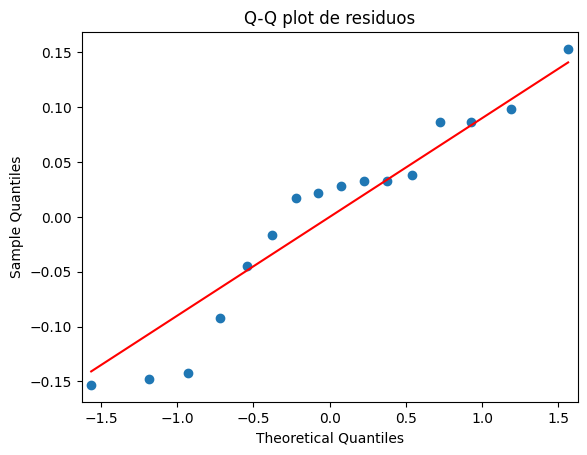

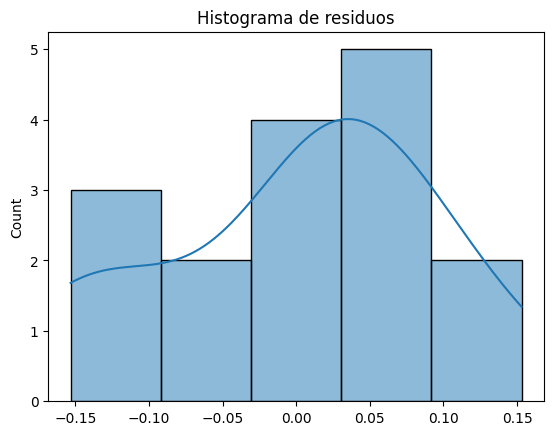

In [369]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No se rechaza ho. Hay normalidad

In [370]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['maiz'] == "A"]['rendimiento']
grupo2 = df[df['maiz'] == "B"]['rendimiento']
grupo3 = df[df['maiz'] == "C"]['rendimiento']
grupo4 = df[df['maiz'] == "D"]['rendimiento']
stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.00035260549065253474


Se rechaza ho, por lo tanto hay heteroscedasticidad

Lambda óptimo: 2.5876077475099035


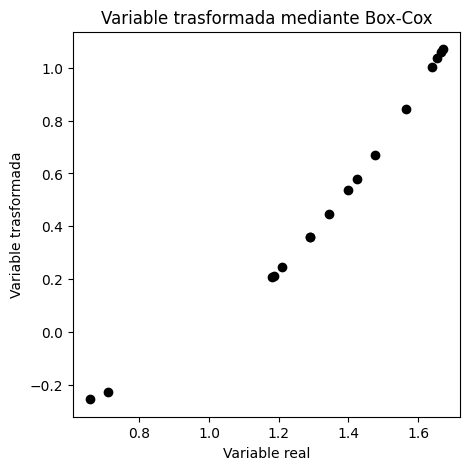

In [371]:
#si no se cumple con el supuesto de normalidad o de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0 ya que si lo hcemos con variables neg dara error
df["rendimiento_boxcox"], lambda_opt = boxcox(df["rendimiento"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["rendimiento"], df["rendimiento_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [372]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'rendimiento_boxcox ~ C(maiz) + C(cultivo) + C(fertilidad)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre maizes
#Hi: Hay diferencia significativa en al menos un maiz
#Alpha: 0.05

sum_sq   df           F    PR(>F)
Intercept      2.074172  1.0  111.859467  0.000042
C(maiz)        0.684904  3.0   12.312217  0.005647
C(cultivo)     0.032610  3.0    0.586211  0.645893
C(fertilidad)  1.877789  3.0   33.756198  0.000375
Residual       0.111256  6.0         NaN       NaN

Hay diferencia en al menos un maiz y hay diferencia en al menos una columna o fertilidad, pero no hay diferencia entre cultivos o renglones

valor-p (Shapiro) = 0.4117780028193852


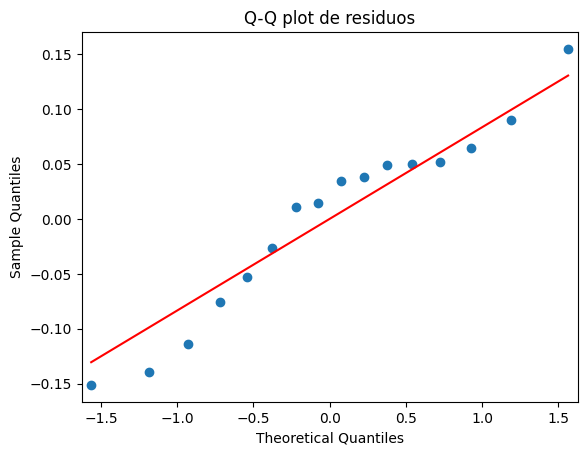

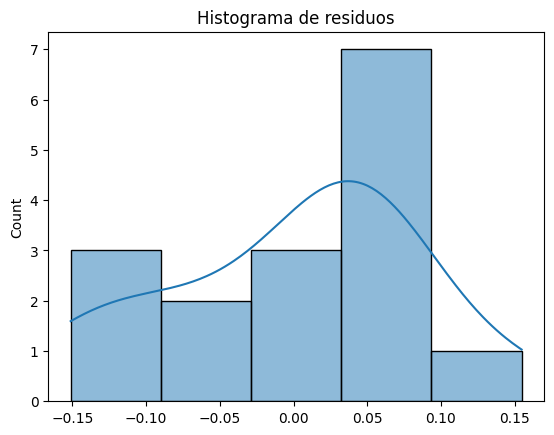

In [373]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

Hay normalidad

In [374]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['maiz'] == "A"]['rendimiento_boxcox']
grupo2 = df[df['maiz'] == "B"]['rendimiento_boxcox']
grupo3 = df[df['maiz'] == "C"]['rendimiento_boxcox']
grupo4 = df[df['maiz'] == "D"]['rendimiento_boxcox']
stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.0740902459329075


Ya hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   0.0044    1.0 -0.4136  0.4224  False
     A      C  -0.4994 0.3555 -0.9175 -0.0814   True
     A      D  -0.2328 0.8521 -0.6508  0.1852  False
     B      C  -0.5039 0.3484 -0.9219 -0.0858   True
     B      D  -0.2372 0.8452 -0.6553  0.1808  False
     C      D   0.2666 0.7956 -0.1514  0.6846  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

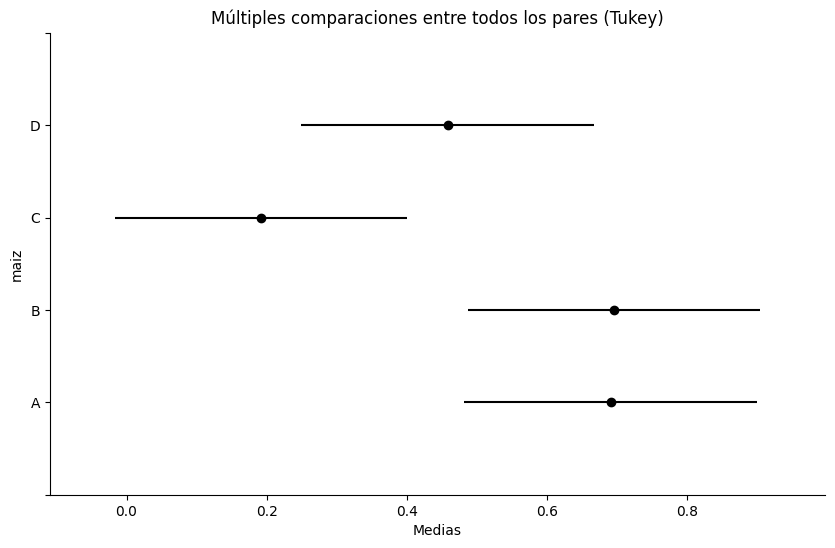

In [375]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['rendimiento_boxcox'], groups=df['maiz'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="maiz", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

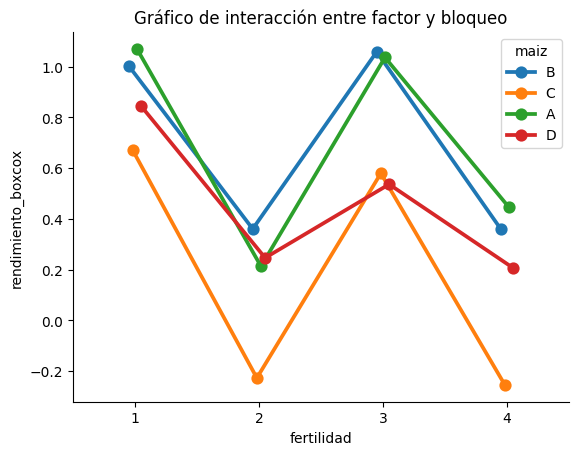

In [376]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="fertilidad", y="rendimiento_boxcox", hue="maiz", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("fertilidad")
plt.ylabel("rendimiento_boxcox")
plt.legend(title="maiz")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [377]:
df.groupby(["maiz"])["rendimiento_boxcox"].mean()

maiz
A    0.691473
B    0.695898
C    0.192037
D    0.458660
Name: rendimiento_boxcox, dtype: float64

In [378]:
modelo_lineal.params

Intercept             1.138577
C(maiz)[T.B]          0.004425
C(maiz)[T.C]         -0.499436
C(maiz)[T.D]         -0.232812
C(cultivo)[T.2]      -0.123829
C(cultivo)[T.3]      -0.041654
C(cultivo)[T.4]      -0.071975
C(fertilidad)[T.2]   -0.749046
C(fertilidad)[T.3]   -0.094188
C(fertilidad)[T.4]   -0.707724
dtype: float64

### problema 11c

In [379]:
import pandas as pd
from io import StringIO

data = '''
rendimiento,maiz
1.640,B
1.210,D
1.425,C
1.345,A
1.475,C
1.185,A
1.400,D
1.290,B
1.670,A
0.710,C
1.665,B
1.180,D
1.565,D
1.290,B
1.655,A
0.660,C
'''

df = pd.read_csv(StringIO(data))
df

rendimiento maiz
0         1.640    B
1         1.210    D
2         1.425    C
3         1.345    A
4         1.475    C
5         1.185    A
6         1.400    D
7         1.290    B
8         1.670    A
9         0.710    C
10        1.665    B
11        1.180    D
12        1.565    D
13        1.290    B
14        1.655    A
15        0.660    C

In [380]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('rendimiento ~ C(maiz)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables
#Hi: si hay relación entre variables
#alpha= 0.05

df    sum_sq   mean_sq         F    PR(>F)
C(maiz)    3.0  0.426842  0.142281  1.729714  0.214009
Residual  12.0  0.987081  0.082257       NaN       NaN

No se rechaza ho, no hay relación, no hay diferencia entre los tipos de maiz

valor-p (Shapiro) = 0.2881077288142598


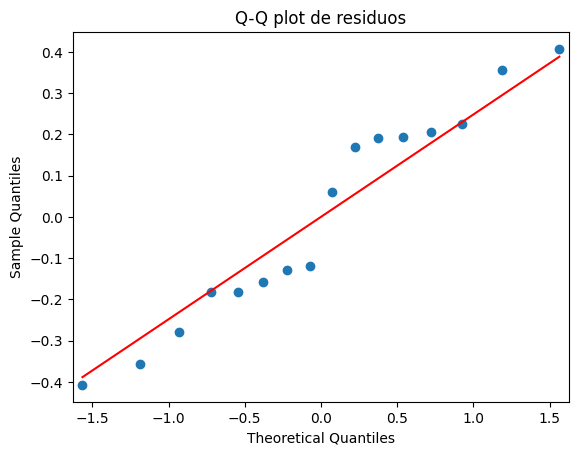

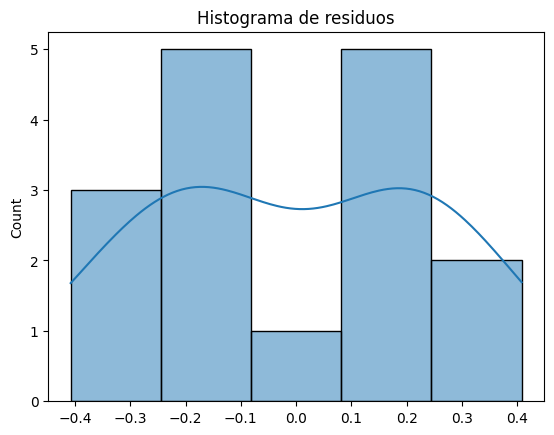

In [381]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No se rechaza ho, hay normalidad

In [382]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['maiz'] == 'A']['rendimiento']
grupo2 = df[df['maiz'] == 'B']['rendimiento']
grupo3 = df[df['maiz'] == 'C']['rendimiento']
grupo4 = df[df['maiz'] == 'D']['rendimiento']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.00035260549065253474


Se rechaza ho, hay heteroscedasticidad

Lambda óptimo: 2.5876077475099035


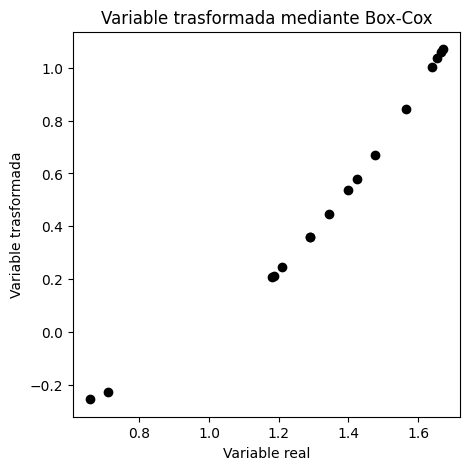

In [383]:
#si no se cumple con el supuesto de normalidad o de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["rendimiento_boxcox"], lambda_opt = boxcox(df["rendimiento"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["rendimiento"], df["rendimiento_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [384]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('rendimiento_boxcox ~ C(maiz)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho: no hay relación entre variables
#Hi: si hay relación entre variables
#alpha= 0.05

df    sum_sq   mean_sq         F    PR(>F)
C(maiz)    3.0  0.684904  0.228301  1.355135  0.303222
Residual  12.0  2.021655  0.168471       NaN       NaN

No hay relación

valor-p (Shapiro) = 0.008303128985516123


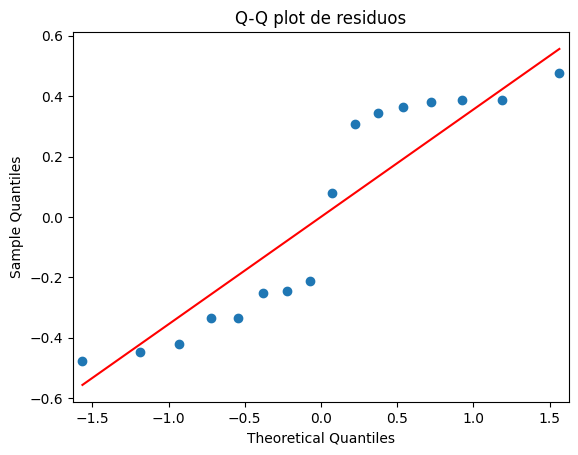

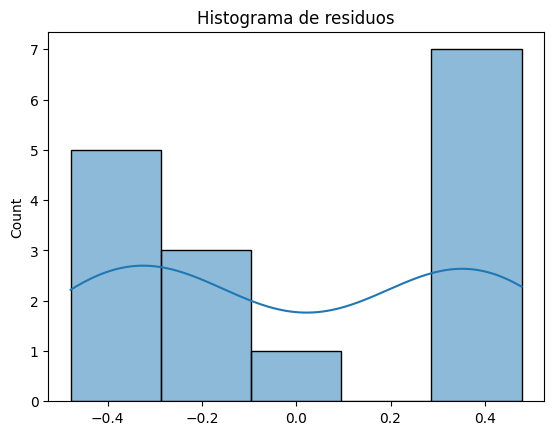

In [385]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No hay normalidad

In [386]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['maiz'] == 'A']['rendimiento_boxcox']
grupo2 = df[df['maiz'] == 'B']['rendimiento_boxcox']
grupo3 = df[df['maiz'] == 'C']['rendimiento_boxcox']
grupo4 = df[df['maiz'] == 'D']['rendimiento_boxcox']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Ho: homoscedasticidad
#Hi: heteroscedasticidad
#alpha= 0.05

p-valor de Levene: 0.0740902459329075


Hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   0.0044    1.0 -0.8573 0.8661  False
     A      C  -0.4994 0.3555 -1.3611 0.3622  False
     A      D  -0.2328 0.8521 -1.0945 0.6289  False
     B      C  -0.5039 0.3484 -1.3655 0.3578  False
     B      D  -0.2372 0.8452 -1.0989 0.6244  False
     C      D   0.2666 0.7956 -0.5951 1.1283  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

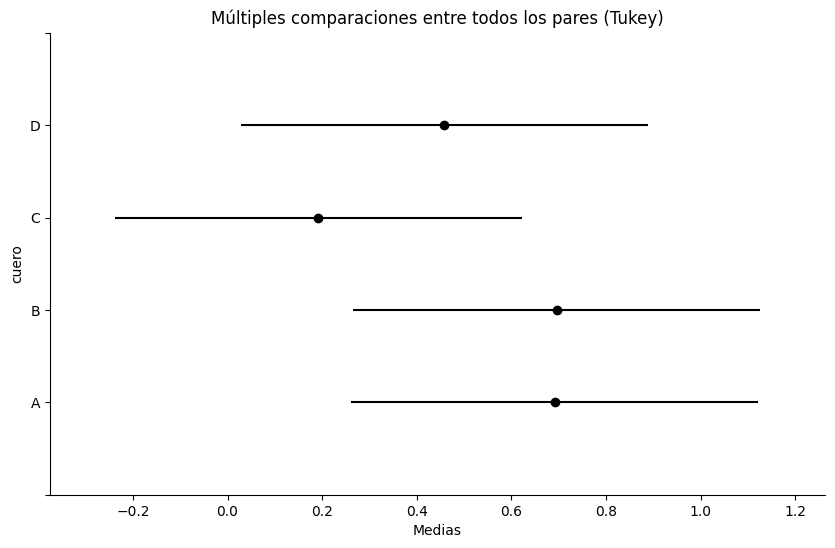

In [387]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['rendimiento_boxcox'], groups=df['maiz'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="cuero", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")


No, ahora se supone que todos los maiz son iguales.

### problema 11d

In [388]:
import pandas as pd
from io import StringIO

data = '''
rendimiento,maiz,fertilidad
1.640,B,1
1.210,D,2
1.425,C,3
1.345,A,4
1.475,C,1
1.185,A,2
1.400,D,3
1.290,B,4
1.670,A,1
0.710,C,2
1.665,B,3
1.180,D,4
1.565,D,1
1.290,B,2
1.655,A,3
0.660,C,4
'''

df = pd.read_csv(StringIO(data))
df

rendimiento maiz  fertilidad
0         1.640    B           1
1         1.210    D           2
2         1.425    C           3
3         1.345    A           4
4         1.475    C           1
5         1.185    A           2
6         1.400    D           3
7         1.290    B           4
8         1.670    A           1
9         0.710    C           2
10        1.665    B           3
11        1.180    D           4
12        1.565    D           1
13        1.290    B           2
14        1.655    A           3
15        0.660    C           4

In [389]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'rendimiento ~ C(maiz) + C(fertilidad)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

sum_sq   df          F    PR(>F)
C(maiz)        0.426842  3.0   8.016365  0.006543
C(fertilidad)  0.827342  3.0  15.538006  0.000665
Residual       0.159739  9.0        NaN       NaN

Se rechaza ho para ambas variables, esto quiere decir que al menos un maíz es diferente y que al menos una columna o fertilidad es diferente.

valor-p (Shapiro) = 0.8721921066453638


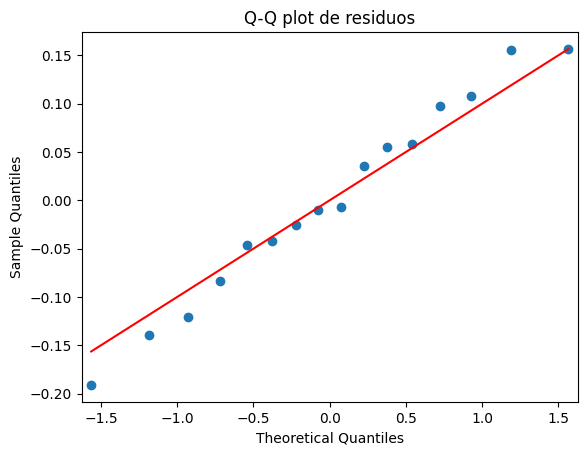

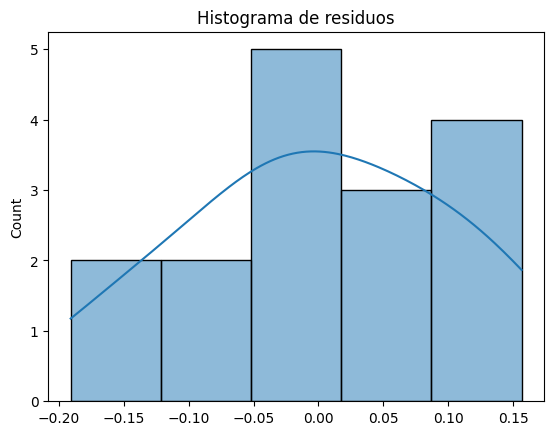

In [390]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No se rechaza que hay normalidad

In [391]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['maiz'] == 'A']['rendimiento']
grupo2 = df[df['maiz'] == 'B']['rendimiento']
grupo3 = df[df['maiz'] == 'C']['rendimiento']
grupo4 = df[df['maiz'] == 'D']['rendimiento']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.00035260549065253474


No hay homoscedasticidad, hay heteroscedasticidad

Lambda óptimo: 2.5876077475099035


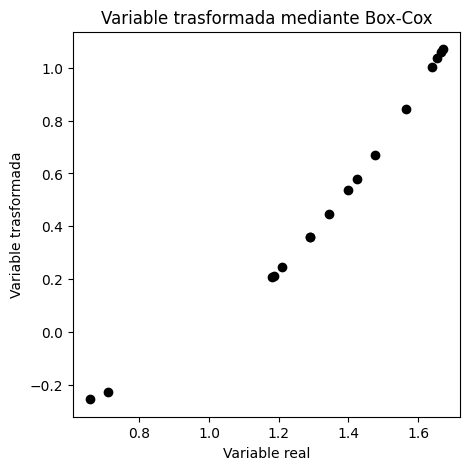

In [392]:
#si no se cumple con el supuesto de normalidad o de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0 ya que si lo hcemos con variables neg dara error
df["rendimiento_boxcox"], lambda_opt = boxcox(df["rendimiento"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["rendimiento"], df["rendimiento_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [393]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'rendimiento_boxcox ~ C(maiz) + C(fertilidad)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

sum_sq   df          F    PR(>F)
C(maiz)        0.684904  3.0  14.282146  0.000906
C(fertilidad)  1.877789  3.0  39.157120  0.000017
Residual       0.143866  9.0        NaN       NaN

hay diferencia en al menos un maiz y en al menos una columna o fertilidad

valor-p (Shapiro) = 0.5303334207507996


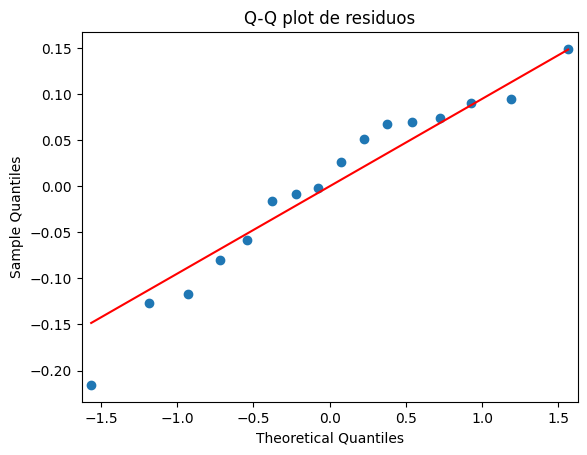

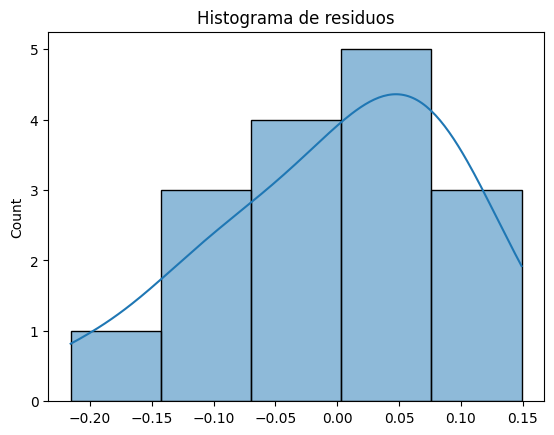

In [394]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

Hay normalidad

In [395]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['maiz'] == 'A']['rendimiento_boxcox']
grupo2 = df[df['maiz'] == 'B']['rendimiento_boxcox']
grupo3 = df[df['maiz'] == 'C']['rendimiento_boxcox']
grupo4 = df[df['maiz'] == 'D']['rendimiento_boxcox']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.0740902459329075


Ya hay homoscedasticidad

Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   0.0044    1.0 -0.4136  0.4224  False
     A      C  -0.4994 0.3555 -0.9175 -0.0814   True
     A      D  -0.2328 0.8521 -0.6508  0.1852  False
     B      C  -0.5039 0.3484 -0.9219 -0.0858   True
     B      D  -0.2372 0.8452 -0.6553  0.1808  False
     C      D   0.2666 0.7956 -0.1514  0.6846  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

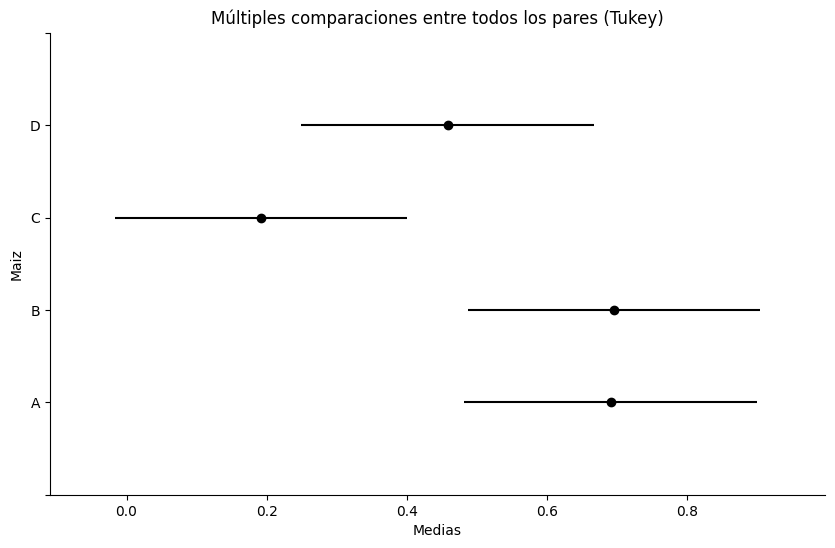

In [396]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['rendimiento_boxcox'], groups=df['maiz'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Maiz", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

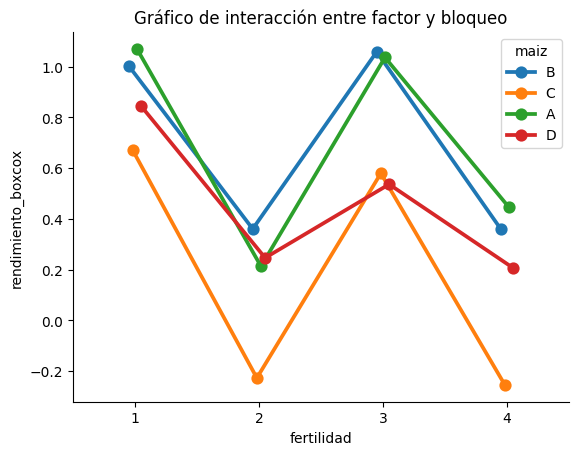

In [397]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="fertilidad", y="rendimiento_boxcox", hue="maiz", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("fertilidad")
plt.ylabel("rendimiento_boxcox")
plt.legend(title="maiz")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [398]:
df.groupby(["maiz"])["rendimiento_boxcox"].mean()

maiz
A    0.691473
B    0.695898
C    0.192037
D    0.458660
Name: rendimiento_boxcox, dtype: float64

In [399]:
modelo_lineal.params

Intercept             1.079212
C(maiz)[T.B]          0.004425
C(maiz)[T.C]         -0.499436
C(maiz)[T.D]         -0.232812
C(fertilidad)[T.2]   -0.749046
C(fertilidad)[T.3]   -0.094188
C(fertilidad)[T.4]   -0.707724
dtype: float64

## Problema 12
Se quieren comparar tres dietas (**A, B, C**) a base de proteínas de origen vegetal utilizando 18 ratas de laboratorio de una misma camada. Primero se observa por un tiempo el apetito para formar tres grupos de seis ratas, según su voracidad; y cada uno de estos grupos se clasifica a su vez en tres grupos de dos ratas, de acuerdo a su peso inicial. Se plantea un experimento donde la variable de respuesta es el peso en gramos ganado por las ratas después de cierto periodo, con los siguientes resultados:

| Apetito/peso inicial | A1        | A2        | A3        |
|-----------------------|-----------|-----------|-----------|
| P1                   | 67 (C)    | 105 (A)   | 95 (B)    |
|                       | 72        | 112       | 86        |
| P2                   | 85 (A)    | 75 (B)    | 88 (C)    |
|                       | 98        | 67        | 110       |
| P3                   | 66 (B)    | 68 (C)    | 108 (A)   |
|                       | 47        | 91        | 120       |

### Preguntas:
a) Analice los datos. ¿Cuáles de los factores influyen en el peso ganado por las ratas?  
b) ¿Cuál dieta es mejor?  
c) ¿Alguno de los factores de bloque puede ser ignorado? Argumente su respuesta.  
d) Si ese fuera el caso, analice de nuevo el experimento y saque conclusiones.  
e) Verifique los supuestos del modelo.  


In [400]:
import pandas as pd
from io import StringIO

data = '''
dieta,pesoin,apetito,pesogr
C,P1,A1,67
C,P1,A1,72
A,P1,A2,105
A,P1,A2,112
B,P1,A3,95
B,P1,A3,86
A,P2,A1,85
A,P2,A1,98
B,P2,A2,75
B,P2,A2,67
C,P2,A3,88
C,P2,A3,110
B,P3,A1,66
B,P3,A1,47
C,P3,A2,68
C,P3,A2,91
A,P3,A3,108
A,P3,A3,120
'''
df = pd.read_csv(StringIO(data))
df

dieta pesoin apetito  pesogr
0      C     P1      A1      67
1      C     P1      A1      72
2      A     P1      A2     105
3      A     P1      A2     112
4      B     P1      A3      95
5      B     P1      A3      86
6      A     P2      A1      85
7      A     P2      A1      98
8      B     P2      A2      75
9      B     P2      A2      67
10     C     P2      A3      88
11     C     P2      A3     110
12     B     P3      A1      66
13     B     P3      A1      47
14     C     P3      A2      68
15     C     P3      A2      91
16     A     P3      A3     108
17     A     P3      A3     120

In [401]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'pesogr ~ C(dieta) + C(apetito) + C(pesoin)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre dietas
#Hi: Hay diferencia significativa en al menos una dieta
#Alpha: 0.05

sum_sq    df           F        PR(>F)
Intercept   22400.000000   1.0  250.067659  6.528197e-09
C(dieta)     3216.000000   2.0   17.951286  3.436198e-04
C(apetito)   2466.333333   2.0   13.766746  1.012859e-03
C(pesoin)     116.333333   2.0    0.649357  5.412916e-01
Residual      985.333333  11.0         NaN           NaN

Se rechaza ho, hay diferencia significativa en al menos una dieta

In [402]:
#Ho: No hay diferencia significativa entre apetitos
#Hi: Hay diferencia significativa en al menos un apetito
#Alpha: 0.05

Se rechaza ho, hay diferencia significativa en al menos un apetito

In [403]:
#Ho: No hay diferencia significativa entre pesos iniciales
#Hi: Hay diferencia significativa en al menos un peso inicial
#Alpha: 0.05

No se rechaza ho, no hay diferencia significativa entre pesos

valor-p (Shapiro) = 0.26073461350664606


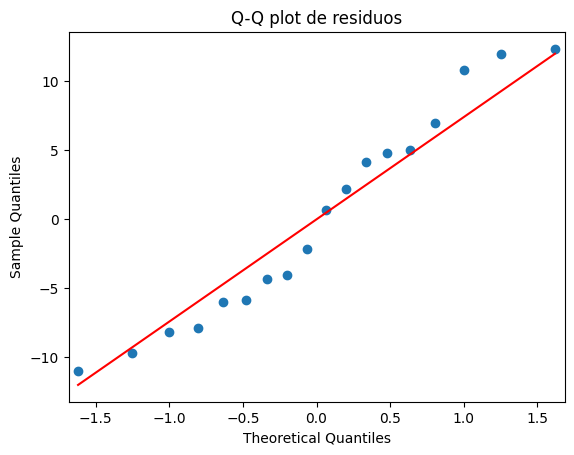

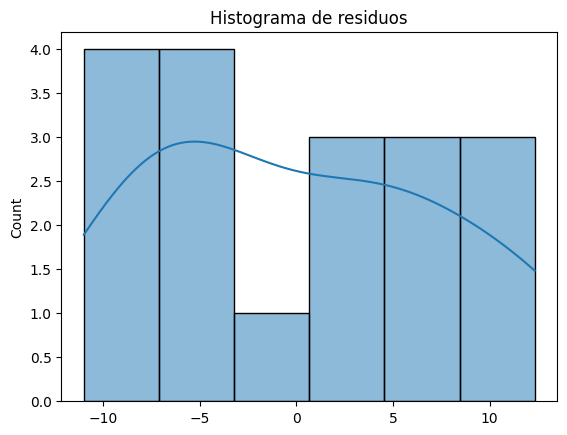

In [404]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No se rechaza ho. Hay normalidad

In [405]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['dieta'] == "A"]['pesogr']
grupo2 = df[df['dieta'] == "B"]['pesogr']
grupo3 = df[df['dieta'] == "C"]['pesogr']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.5795758016998872


No se rechaza ho. Hay homoscedasticidad

 Multiple Comparison of Means - Tukey HSD, FWER=0.50  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B    -32.0 0.0071 -42.2339 -21.7661   True
     A      C    -22.0 0.0634 -32.2339 -11.7661   True
     B      C     10.0 0.5152  -0.2339  20.2339  False
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

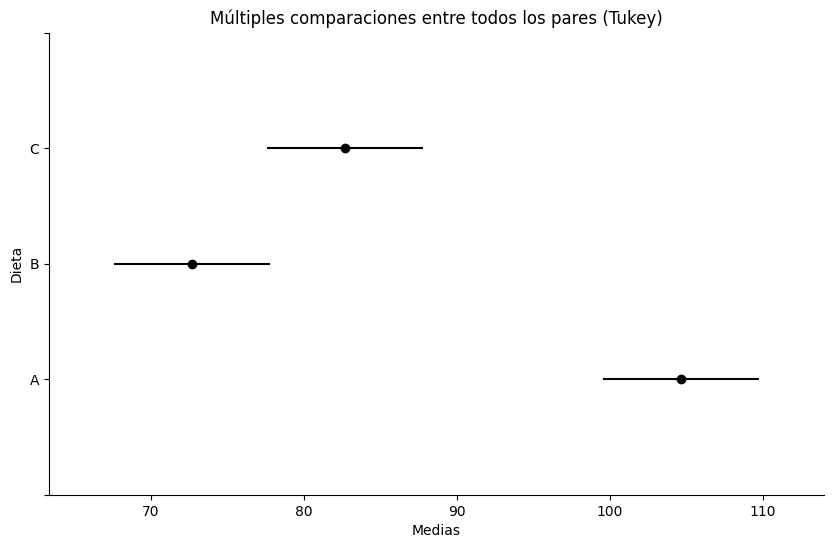

In [406]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['pesogr'], groups=df['dieta'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Dieta", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

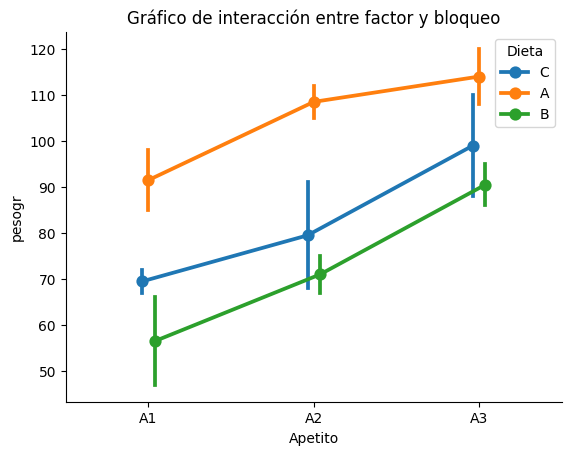

In [407]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="apetito", y="pesogr", hue="dieta", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("Apetito")
plt.ylabel("pesogr")
plt.legend(title="Dieta")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [408]:
df.groupby(["dieta"])["pesogr"].mean()

dieta
A    104.666667
B     72.666667
C     82.666667
Name: pesogr, dtype: float64

In [409]:
modelo_lineal.params

Intercept           93.333333
C(dieta)[T.B]      -32.000000
C(dieta)[T.C]      -22.000000
C(apetito)[T.A2]    13.833333
C(apetito)[T.A3]    28.666667
C(pesoin)[T.P2]     -2.333333
C(pesoin)[T.P3]     -6.166667
dtype: float64

## Problema 13
Una compañía distribuidora ubicada en los suburbios está interesada en estudiar la diferencia en costos (tiempo y gasolina) entre las cuatro rutas (**A, B, C, D**) que llevan a la zona comercial, más importante para ellos, en el otro extremo de la ciudad. Deciden correr un experimento en cuadro grecolatino controlando los factores de bloque **chofer**, marca de vehículo (**α, β, χ, δ**) y día de la semana. El experimento se repite en dos semanas diferentes, en las cuales no hay días festivos ni quincenas. Los costos observados en pesos se muestran en la siguiente tabla:

| Chofer/día | Lunes       | Martes      | Miércoles   | Jueves      |
|------------|-------------|-------------|-------------|-------------|
| Carlos     | 825(D, α)   | 585(C, χ)   | 550(B, β)   | 580(A, δ)   |
|            | 750         | 610         | 580         | 650         |
| Enrique    | 650(A, χ)   | 540(B, α)   | 580(C, χ)   | 850(D, β)   |
|            | 725         | 560         | 635         | 770         |
| Genaro     | 700(C, β)   | 650(D, δ)   | 635(A, α)   | 450(B, χ)   |
|            | 675         | 740         | 540         | 550         |
| Luis       | 475(B, δ)   | 560(A, β)   | 650(D, α)   | 670(C, α)   |
|            | 480         | 615         | 725         | 730         |

### Preguntas:
a) Haga el análisis de varianza de este experimento.  
b) Realice las pruebas de comparaciones múltiples para los factores significativos.  
c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.  
d) ¿Cuál es la mejor ruta? ¿Cuál es la peor?  
e) ¿Hay diferencias significativas entre los choferes? ¿Y entre el tipo o marca de unidad?  
f) ¿Cuáles factores de bloque valió la pena tomar en cuenta en el experimento?  
g) ¿Por qué se evitaron días festivos y quincenas en el experimento? ¿Cuáles otros aspectos se tenían que tomar en cuenta?  
h) Verifique los supuestos del modelo.  


In [410]:
import pandas as pd
from io import StringIO

data = '''
Chofer,Dia,Ruta,Vehiculo,Costo
Carlos,Lunes,D,α,825
Carlos,Lunes,D,α,750
Carlos,Martes,C,χ,585
Carlos,Martes,C,χ,610
Carlos,Miércoles,B,β,550
Carlos,Miércoles,B,β,580
Carlos,Jueves,A,δ,580
Carlos,Jueves,A,δ,650
Enrique,Lunes,A,χ,650
Enrique,Lunes,A,χ,725
Enrique,Martes,B,α,540
Enrique,Martes,B,α,560
Enrique,Miércoles,C,χ,580
Enrique,Miércoles,C,χ,635
Enrique,Jueves,D,β,850
Enrique,Jueves,D,β,770
Genaro,Lunes,C,β,700
Genaro,Lunes,C,β,675
Genaro,Martes,D,δ,650
Genaro,Martes,D,δ,740
Genaro,Miércoles,A,α,635
Genaro,Miércoles,A,α,540
Genaro,Jueves,B,χ,450
Genaro,Jueves,B,χ,550
Luis,Lunes,B,δ,475
Luis,Lunes,B,δ,480
Luis,Martes,A,β,560
Luis,Martes,A,β,615
Luis,Miércoles,D,α,650
Luis,Miércoles,D,α,725
Luis,Jueves,C,α,670
Luis,Jueves,C,α,730
'''

df = pd.read_csv(StringIO(data))
df

Chofer        Dia Ruta Vehiculo  Costo
0    Carlos      Lunes    D        α    825
1    Carlos      Lunes    D        α    750
2    Carlos     Martes    C        χ    585
3    Carlos     Martes    C        χ    610
4    Carlos  Miércoles    B        β    550
5    Carlos  Miércoles    B        β    580
6    Carlos     Jueves    A        δ    580
7    Carlos     Jueves    A        δ    650
8   Enrique      Lunes    A        χ    650
9   Enrique      Lunes    A        χ    725
10  Enrique     Martes    B        α    540
11  Enrique     Martes    B        α    560
12  Enrique  Miércoles    C        χ    580
13  Enrique  Miércoles    C        χ    635
14  Enrique     Jueves    D        β    850
15  Enrique     Jueves    D        β    770
16   Genaro      Lunes    C        β    700
17   Genaro      Lunes    C        β    675
18   Genaro     Martes    D        δ    650
19   Genaro     Martes    D        δ    740
20   Genaro  Miércoles    A        α    635
21   Genaro  Miércoles    A        α    540
22   Genaro     Jueves    B        χ    450
23   Genaro     Jueves    B        χ    550
24     Luis      Lunes    B        δ    475
25     Luis      Lunes    B        δ    480
26     Luis     Martes    A        β    560
27     Luis     Martes    A        β    615
28     Luis  Miércoles    D        α    650
29     Luis  Miércoles    D        α    725
30     Luis     Jueves    C        α    670
31     Luis     Jueves    C        α    730

In [411]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'Costo ~ C(Ruta) + C(Chofer) + C(Vehiculo) + C(Dia)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova
#Ho: No hay diferencia significativa entre rutas
#Hi: Hay diferencia significativa en al menos una ruta
#Alpha: 0.05

sum_sq    df           F        PR(>F)
Intercept    1.026109e+06   1.0  439.054681  1.363341e-14
C(Ruta)      1.691187e+05   3.0   24.120992  1.080024e-06
C(Chofer)    1.435678e+04   3.0    2.047674  1.412634e-01
C(Vehiculo)  2.144376e+04   3.0    3.058473  5.328653e-02
C(Dia)       2.342150e+04   3.0    3.340553  4.114943e-02
Residual     4.440467e+04  19.0         NaN           NaN

Se rechaza ho, hay diferencia significativa en al menos una ruta

In [412]:
#Ho: No hay diferencia significativa entre choferes
#Hi: Hay diferencia significativa en al menos un chofer
#Alpha: 0.05

No se rechaza ho, no hay diferencia significativa entre choferes

In [413]:
#Ho: No hay diferencia significativa entre vehiculos
#Hi: Hay diferencia significativa en al menos un vehiculo
#Alpha: 0.05

No se rechaza ho, no hay diferencia significativa entre choferes

In [414]:
#Ho: No hay diferencia significativa entre dias
#Hi: Hay diferencia significativa en al menos un dia
#Alpha: 0.05

Se rechaza ho, hay diferencia significativa en al menos un dia

valor-p (Shapiro) = 0.33700414291944597


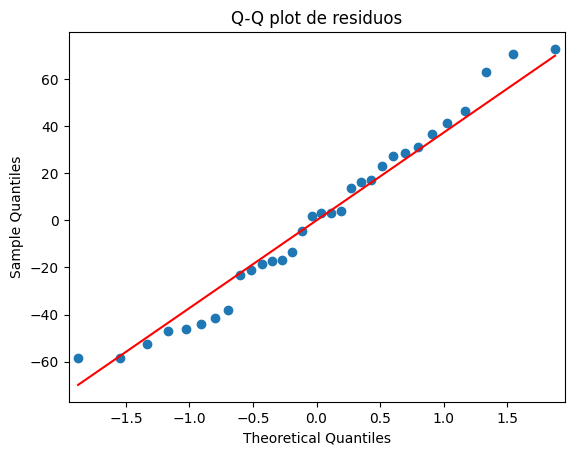

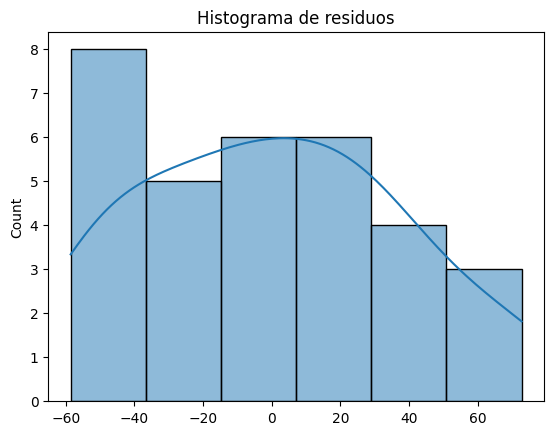

In [415]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

Hay normalidad

In [416]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['Ruta'] == "A"]['Costo']
grupo2 = df[df['Ruta'] == "B"]['Costo']
grupo3 = df[df['Ruta'] == "C"]['Costo']
grupo4 = df[df['Ruta'] == "D"]['Costo']
stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Ho: Homoscedasticidad
#Hi: Heteroscedasticidad
#Alpha: 0.05

p-valor de Levene: 0.821353794229988


Hay homoscedasticidad

  Multiple Comparison of Means - Tukey HSD, FWER=0.50  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B   -96.25 0.0148 -138.1298 -54.3702   True
     A      C    28.75 0.7661  -13.1298  70.6298  False
     A      D  125.625 0.0012   83.7452 167.5048   True
     B      C    125.0 0.0012   83.1202 166.8798   True
     B      D  221.875    0.0  179.9952 263.7548   True
     C      D   96.875 0.0141   54.9952 138.7548   True
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

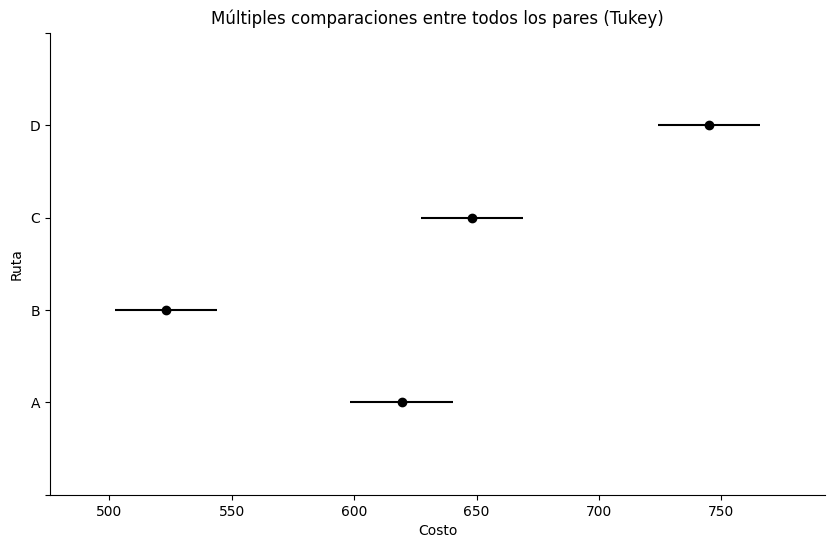

In [417]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Costo'], groups=df['Ruta'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Ruta", xlabel="Costo")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

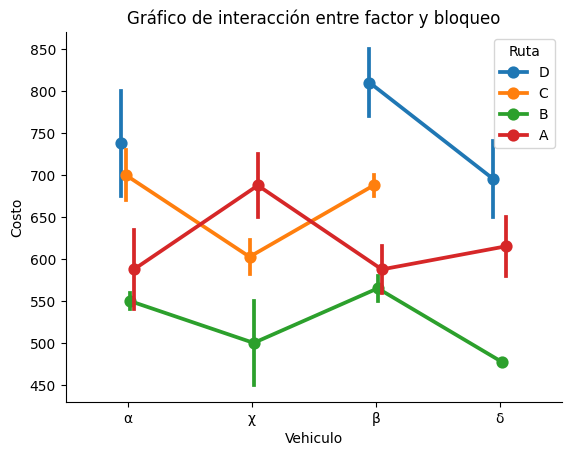

In [418]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="Vehiculo", y="Costo", hue="Ruta", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("Vehiculo")
plt.ylabel("Costo")
plt.legend(title="Ruta")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [419]:
df.groupby(["Ruta"])["Costo"].mean()

Ruta
A    619.375
B    523.125
C    648.125
D    745.000
Name: Costo, dtype: float64

In [420]:
modelo_lineal.params

Intercept               679.674797
C(Ruta)[T.B]            -96.250000
C(Ruta)[T.C]             28.318089
C(Ruta)[T.D]            112.850610
C(Chofer)[T.Enrique]     22.068089
C(Chofer)[T.Genaro]     -23.750000
C(Chofer)[T.Luis]       -40.899390
C(Vehiculo)[T.β]          7.886179
C(Vehiculo)[T.δ]        -52.825203
C(Vehiculo)[T.χ]        -51.097561
C(Dia)[T.Lunes]           3.750000
C(Dia)[T.Martes]        -48.750000
C(Dia)[T.Miércoles]     -57.581301
dtype: float64

## Problema 14
23. Un investigador está interesado en el efecto del porcentaje de lisina y del porcentaje de proteína en la producción de vacas lecheras. Se consideran siete niveles en cada factor:

- **% de lisina**: 0.0 (**A**), 0.1 (**B**), 0.2 (**C**), 0.3 (**D**), 0.4 (**E**), 0.5 (**F**), 0.6 (**G**).  
- **% de proteína**: 2 (**α**), 4 (**β**), 6 (**χ**), 8 (**δ**), 10 (**ε**), 12 (**φ**), 14 (**γ**).  

Para el estudio, se seleccionaron siete vacas al azar, a las cuales se les da un seguimiento de siete periodos de tres meses. Los datos en galones de leche fueron los siguientes:

| Vaca/periodo | 1       | 2       | 3       | 4       | 5       | 6       | 7       |
|--------------|---------|---------|---------|---------|---------|---------|---------|
| 1            | 304 (Aα)| 436 (Bε)| 350 (Cβ)| 504 (Dφ)| 417 (Eχ)| 519 (Fγ)| 432 (Gδ)|
| 2            | 381 (Bβ)| 505 (Cφ)| 425 (Dχ)| 564 (Eγ)| 487 (Fα)| 536 (Gε)| 483 (Aχ)|
| 3            | 432 (Cχ)| 566 (Dγ)| 479 (Eε)| 357 (Fα)| 466 (Gβ)| 465 (Aφ)| 507 (Bγ)|
| 4            | 442 (Dδ)| 372 (Eχ)| 536 (Fε)| 366 (Gβ)| 495 (Aχ)| 425 (Bφ)| 507 (Cγ)|
| 5            | 496 (Eε)| 449 (Fβ)| 493 (Gφ)| 345 (Aχ)| 509 (Bγ)| 481 (Cδ)| 380 (Dα)|
| 6            | 534 (Fφ)| 421 (Gχ)| 352 (Aγ)| 427 (Bδ)| 346 (Cχ)| 478 (Dε)| 397 (Eβ)|
| 7            | 543 (Gγ)| 386 (Aδ)| 435 (Bα)| 485 (Cε)| 406 (Dφ)| 554 (Eφ)| 410 (Fχ)|

### Preguntas y ejercicios:
a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?  
b) Interprete los resultados usando gráficos de medias.  
c) ¿Cómo puede explicar la falta de efectos en vacas y periodo?  
d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?  
e) Verifique los supuestos del modelo.  


In [421]:
import pandas as pd
from io import StringIO

data = '''
vaca,periodo,galones,lisina,proteina
1,1,304,A,α
1,2,436,B,ε
1,3,350,C,β
1,4,504,D,φ
1,5,417,E,χ
1,6,519,F,γ
1,7,432,G,δ
2,1,381,B,β
2,2,505,C,φ
2,3,425,D,χ
2,4,564,E,γ
2,5,487,F,α
2,6,536,G,ε
2,7,483,A,χ
3,1,432,C,χ
3,2,566,D,γ
3,3,479,E,ε
3,4,357,F,α
3,5,466,G,β
3,6,465,A,φ
3,7,507,B,γ
4,1,442,D,δ
4,2,372,E,χ
4,3,536,F,ε
4,4,366,G,β
4,5,495,A,χ
4,6,425,B,φ
4,7,507,C,γ
5,1,496,E,ε
5,2,449,F,β
5,3,493,G,φ
5,4,345,A,χ
5,5,509,B,γ
5,6,481,C,δ
5,7,380,D,α
6,1,534,F,φ
6,2,421,G,χ
6,3,352,A,γ
6,4,427,B,δ
6,5,346,C,χ
6,6,478,D,ε
6,7,397,E,β
7,1,543,G,γ
7,2,386,A,δ
7,3,435,B,α
7,4,485,C,ε
7,5,406,D,φ
7,6,554,E,φ
7,7,410,F,χ
'''

df = pd.read_csv(StringIO(data))
df

vaca  periodo  galones lisina proteina
0      1        1      304      A        α
1      1        2      436      B        ε
2      1        3      350      C        β
3      1        4      504      D        φ
4      1        5      417      E        χ
5      1        6      519      F        γ
6      1        7      432      G        δ
7      2        1      381      B        β
8      2        2      505      C        φ
9      2        3      425      D        χ
10     2        4      564      E        γ
11     2        5      487      F        α
12     2        6      536      G        ε
13     2        7      483      A        χ
14     3        1      432      C        χ
15     3        2      566      D        γ
16     3        3      479      E        ε
17     3        4      357      F        α
18     3        5      466      G        β
19     3        6      465      A        φ
20     3        7      507      B        γ
21     4        1      442      D        δ
22     4        2      372      E        χ
23     4        3      536      F        ε
24     4        4      366      G        β
25     4        5      495      A        χ
26     4        6      425      B        φ
27     4        7      507      C        γ
28     5        1      496      E        ε
29     5        2      449      F        β
30     5        3      493      G        φ
31     5        4      345      A        χ
32     5        5      509      B        γ
33     5        6      481      C        δ
34     5        7      380      D        α
35     6        1      534      F        φ
36     6        2      421      G        χ
37     6        3      352      A        γ
38     6        4      427      B        δ
39     6        5      346      C        χ
40     6        6      478      D        ε
41     6        7      397      E        β
42     7        1      543      G        γ
43     7        2      386      A        δ
44     7        3      435      B        α
45     7        4      485      C        ε
46     7        5      406      D        φ
47     7        6      554      E        φ
48     7        7      410      F        χ

In [422]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'galones ~ C(lisina) * C(proteina) + C(vaca) + C(periodo)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)
tabla_anova

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 36, but rank is 32
  warnings.warn('covariance of constraints does not have full '


sum_sq    df           F    PR(>F)
C(lisina)                3955.124768   6.0   39.551248  0.120114
C(proteina)             44395.841646   6.0  443.958416  0.034871
C(vaca)                 30125.442616   6.0  301.254426  0.044074
C(periodo)              23205.125640   6.0  232.051256  0.050208
C(lisina):C(proteina)  143959.526403  36.0  239.932544  0.051073
Residual                   16.666667   1.0         NaN       NaN

Se rechaza ho para proteina y para vaca, lo que quiere decir que ambas si influyen en la producción de leche en galones; mientras que las demas variables no rechazan ho, se admite que no tienen relación con la producción de leche.

valor-p (Shapiro) = 0.33700414291944597


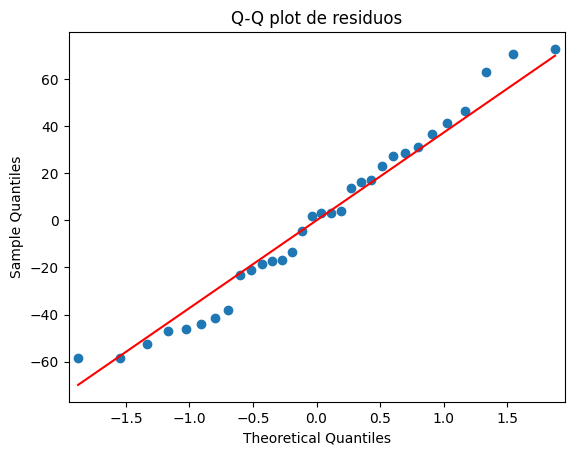

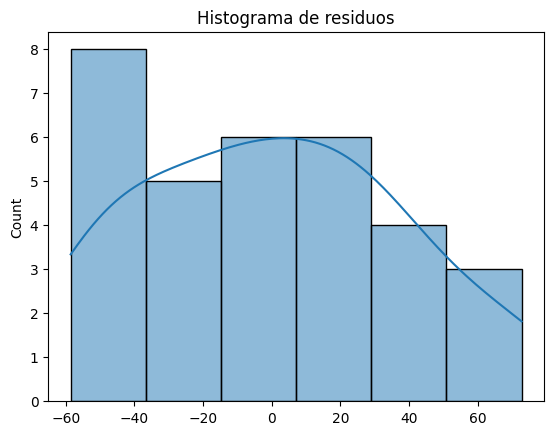

In [423]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")
#Ho: Normalidad
#Hi: No normalidad
#Alpha: 0.05

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

No se rechaza ho, hay normalidad

In [424]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['proteina'] == 'α']['galones']
grupo2 = df[df['proteina'] == 'β']['galones']
grupo3 = df[df['proteina'] == 'χ']['galones']
grupo4 = df[df['proteina'] == 'δ']['galones']
grupo5 = df[df['proteina'] == 'ε']['galones']
grupo6 = df[df['proteina'] == 'φ']['galones']
grupo7 = df[df['proteina'] == 'γ']['galones']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5, grupo6, grupo7)
print(f"p-valor de Levene: {p}")
#Ho. homoscedasticidad
#Hi. heteroscedasticidad
#Alpha. 0.05

p-valor de Levene: 0.857423958786824


No se rechaza ho, hay homoscedasticidad

  Multiple Comparison of Means - Tukey HSD, FWER=0.50  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     α      β      8.9    1.0  -51.1963  68.9963  False
     α      γ  115.775 0.0065   59.1962 172.3538   True
     α      δ     41.0 0.8774  -21.7685 103.7685  False
     α      ε  99.6857 0.0352   41.5734 157.7981   True
     α      φ    93.15 0.0487   36.5712 149.7288   True
     α      χ     22.0 0.9872  -32.3591  76.3591  False
     β      γ  106.875 0.0086   53.2762 160.4738   True
     β      δ     32.1 0.9494  -27.9963  92.1963  False
     β      ε  90.7857 0.0492   35.5705 146.0009   True
     β      φ    84.25 0.0682   30.6512 137.8488   True
     β      χ     13.1  0.999  -38.1503  64.3503  False
     γ      δ  -74.775 0.1878 -131.3538 -18.1962   True
     γ      ε -16.0893 0.9968  -67.4538  35.2753  False
     γ      φ  -22.625 0.9765  -72.2479  26.9979  False
     γ      χ  -93.775 0.0087 -140.8514 -46.6986

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

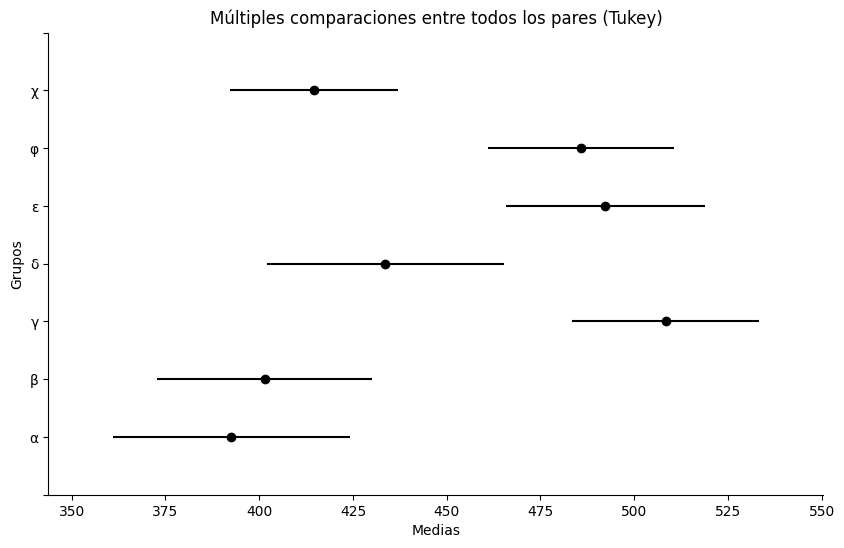

In [425]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['galones'], groups=df['proteina'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

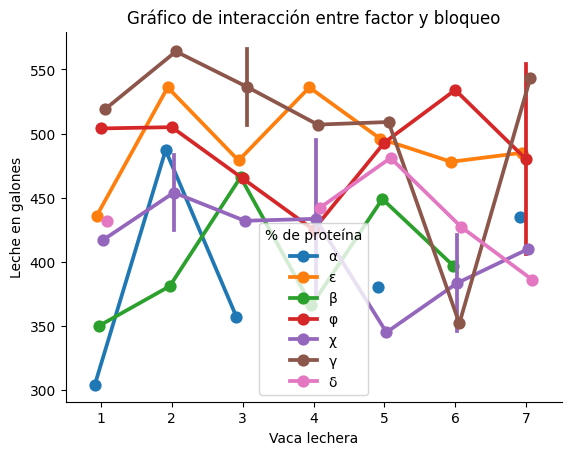

In [426]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="vaca", y="galones", hue="proteina", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("Vaca lechera")
plt.ylabel("Leche en galones")
plt.legend(title="% de proteína")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

In [427]:
df.groupby(["proteina"])["galones"].mean()

proteina
α    392.600000
β    401.500000
γ    508.375000
δ    433.600000
ε    492.285714
φ    485.750000
χ    414.600000
Name: galones, dtype: float64

In [428]:
modelo_lineal.params

Intercept               679.674797
C(Ruta)[T.B]            -96.250000
C(Ruta)[T.C]             28.318089
C(Ruta)[T.D]            112.850610
C(Chofer)[T.Enrique]     22.068089
C(Chofer)[T.Genaro]     -23.750000
C(Chofer)[T.Luis]       -40.899390
C(Vehiculo)[T.β]          7.886179
C(Vehiculo)[T.δ]        -52.825203
C(Vehiculo)[T.χ]        -51.097561
C(Dia)[T.Lunes]           3.750000
C(Dia)[T.Martes]        -48.750000
C(Dia)[T.Miércoles]     -57.581301
dtype: float64